## GNOM Testing with Linear Regression

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#### Wine Quality: 200 Epochs, Learning Rate = 0.01

In [ ]:
GD_file_path = "wine/GD/lr-0.01/200/no_batching/2024-09-20-14:36:32/results.csv"

GD_stats = pd.read_csv(GD_file_path)

In [ ]:
GNOM_file_path = "wine/GNOM/lr-0.01/200/no_batching/2024-09-20-14:35:46/results.csv"
GNOM_stats = pd.read_csv(GNOM_file_path)

In [ ]:
# SGD with batch size = 1
SGD_1_file = "wine/GD/lr-0.01/200/1/2024-09-20-14:50:48/results.csv"
SGD_1 = pd.read_csv(SGD_1_file)

In [ ]:
# SGD with batch size = 32
SGD_32_file = "wine/GD/lr-0.01/200/32/2024-09-20-14:40:37/results.csv"
SGD_32 = pd.read_csv(SGD_32_file)

In [ ]:
# SGD with batch size = 128
SGD_128_file = "wine/GD/lr-0.01/200/128/2024-09-20-14:40:13/results.csv"
SGD_128 = pd.read_csv(SGD_128_file)

In [ ]:
# SGD with batch size = 512
SGD_512_file = "wine/GD/lr-0.01/200/512/2024-09-20-14:39:58/results.csv"
SGD_512 = pd.read_csv(SGD_512_file)

#### Communities and Crime: 200 epochs, lr = 0.01

In [18]:
GD_file_path = "communities_and_crime/GD/lr-0.01/200/no_batching/2024-09-23-15:18:17/results.csv"

GD_stats = pd.read_csv(GD_file_path)

In [19]:
GNOM_file_path = "communities_and_crime/GNOM/lr-0.01/200/no_batching/2024-09-23-15:18:48/results.csv"
GNOM_stats = pd.read_csv(GNOM_file_path)

In [20]:
GNOM_32_file = "communities_and_crime/GNOM/lr-0.01/200/32/2024-09-23-17:24:54/results.csv"
GNOM_32 = pd.read_csv(GNOM_32_file)

In [21]:
GNOM_128_file = "communities_and_crime/GNOM/lr-0.01/200/128/2024-09-23-17:24:37/results.csv"
GNOM_128 = pd.read_csv(GNOM_128_file)

In [22]:
GNOM_256_file = "communities_and_crime/GNOM/lr-0.01/200/256/2024-09-23-17:24:20/results.csv"
GNOM_256 = pd.read_csv(GNOM_256_file)

In [23]:
GNOM_512_file = "communities_and_crime/GNOM/lr-0.01/200/512/2024-09-23-17:23:25/results.csv"
GNOM_512 = pd.read_csv(GNOM_512_file)

#### Communities and Crime: 300 epochs, lr = 0.001

In [29]:
GD_file_path = "communities_and_crime/GD/lr-0.001/300/no_batching/2024-09-23-17:19:50/results.csv"

GD_stats = pd.read_csv(GD_file_path)

In [30]:
GNOM_file_path = "communities_and_crime/GNOM/lr-0.001/300/no_batching/2024-09-23-17:18:58/results.csv"
GNOM_stats = pd.read_csv(GNOM_file_path)

#### Communities and Crime: 500 epochs, lr = 0.001, 0.0005, 0.0001, 0.00001

In [42]:
GNOM_001_file_path = "communities_and_crime/GNOM/lr-0.001/500/no_batching/2024-09-23-16:50:21/results.csv"
GNOM_0005_file_path = "communities_and_crime/GNOM/lr-0.0005/500/no_batching/2024-09-23-17:57:06/results.csv"
GNOM_0001_file_path = "communities_and_crime/GNOM/lr-0.0001/500/no_batching/2024-09-23-17:58:05/results.csv"
GNOM_00001_file_path = "communities_and_crime/GNOM/lr-1e-05/500/no_batching/2024-09-23-17:58:21/results.csv"

# Read CSV files
GNOM_001_stats = pd.read_csv(GNOM_001_file_path)
GNOM_0005_stats = pd.read_csv(GNOM_0005_file_path)
GNOM_0001_stats = pd.read_csv(GNOM_0001_file_path)
GNOM_00001_stats = pd.read_csv(GNOM_00001_file_path)


#### Communities and Crime: SGD Grid Search 200 epochs, lr = 0.1, 0.05, 0.01, 0.005, 0.001, AND further 0.075, 0.025

In [6]:
# File paths for SGD with different learning rates
SGD_01_file_path = "communities_and_crime/GD/lr-0.1/200/no_batching/2024-09-24-10:06:23/results.csv"
SGD_0055_file_path = "communities_and_crime/GD/lr-0.055/200/no_batching/2024-09-24-10:20:31/results.csv"
SGD_005_file_path = "communities_and_crime/GD/lr-0.05/200/no_batching/2024-09-24-10:07:32/results.csv"
SGD_0025_file_path = "communities_and_crime/GD/lr-0.025/200/no_batching/2024-09-24-10:20:05/results.csv"
SGD_001_file_path = "communities_and_crime/GD/lr-0.01/200/no_batching/2024-09-23-15:18:17/results.csv"
SGD_0005_file_path = "communities_and_crime/GD/lr-0.005/200/no_batching/2024-09-24-10:07:49/results.csv"
SGD_0001_file_path = "communities_and_crime/GD/lr-0.001/200/no_batching/2024-09-24-10:08:25/results.csv"

# Read CSV files for each learning rate
SGD_01_stats = pd.read_csv(SGD_01_file_path)
SGD_0055_stats = pd.read_csv(SGD_0055_file_path)
SGD_005_stats = pd.read_csv(SGD_005_file_path)
SGD_0025_stats = pd.read_csv(SGD_0025_file_path)
SGD_001_stats = pd.read_csv(SGD_001_file_path)
SGD_0005_stats = pd.read_csv(SGD_0005_file_path)
SGD_0001_stats = pd.read_csv(SGD_0001_file_path)


## Plots

#### GD vs. GNOM

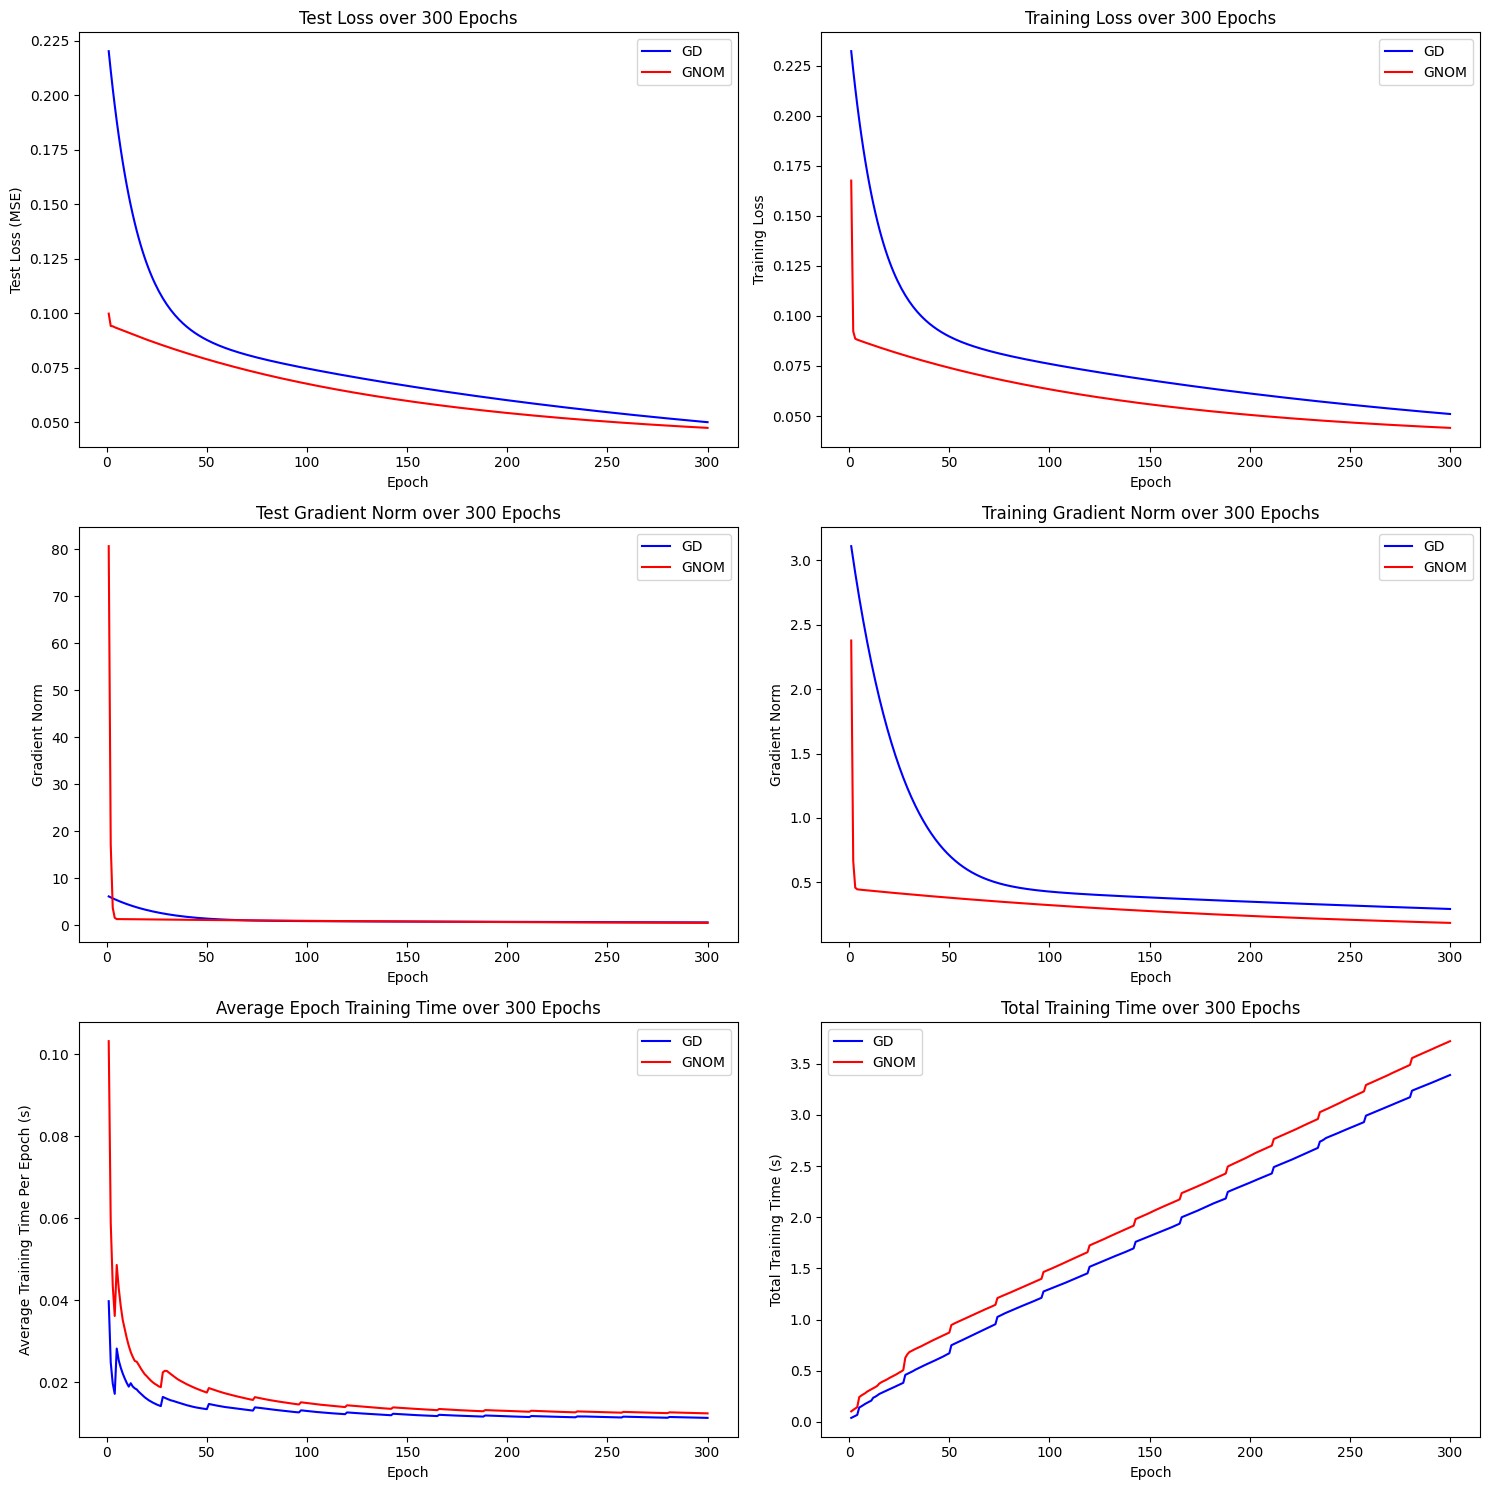

In [35]:
# Extract data from DataFrames
epochs = GD_stats['Epoch']
num_epochs = len(epochs)

GD_test_loss = GD_stats['Test Loss']
GNOM_test_loss = GNOM_stats['Test Loss']

GD_training_loss = GD_stats['Training Loss']
GNOM_training_loss = GNOM_stats['Training Loss']

GD_train_norm = GD_stats['Training Gradient Norm']
GNOM_train_norm = GNOM_stats['Training Gradient Norm']

GD_test_norm = GD_stats['Test Gradient Norm']
GNOM_test_norm = GNOM_stats['Test Gradient Norm']

# Calculate average training time (expanding mean)
GD_avg_training_time = GD_stats['Training Time (s)'].expanding().mean()
GNOM_avg_training_time = GNOM_stats['Training Time (s)'].expanding().mean()

# Calculate total training time (expanding mean)
GD_total_training_time = GD_stats['Training Time (s)'].expanding().sum()
GNOM_total_training_time = GNOM_stats['Training Time (s)'].expanding().sum()

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Test Loss
axes[0, 0].plot(epochs, GD_test_loss, label='GD', color='blue')
axes[0, 0].plot(epochs, GNOM_test_loss, label='GNOM', color='red')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Test Loss (MSE)')
axes[0, 0].set_title(f'Test Loss over {num_epochs} Epochs')
axes[0, 0].legend()

# Plot 2: Training Loss
axes[0, 1].plot(epochs, GD_training_loss, label='GD', color='blue')
axes[0, 1].plot(epochs, GNOM_training_loss, label='GNOM', color='red')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Training Loss')
axes[0, 1].set_title(f'Training Loss over {num_epochs} Epochs')
axes[0, 1].legend()

# Plot 3: Training Gradient Norm
axes[1, 1].plot(epochs, GD_train_norm, label='GD', color='blue')
axes[1, 1].plot(epochs, GNOM_train_norm, label='GNOM', color='red')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Gradient Norm')
axes[1, 1].set_title(f'Training Gradient Norm over {num_epochs} Epochs')
axes[1, 1].legend()

# Plot 4: Test Gradient Norm
axes[1, 0].plot(epochs, GD_test_norm, label='GD', color='blue')
axes[1, 0].plot(epochs, GNOM_test_norm, label='GNOM', color='red')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Gradient Norm')
axes[1, 0].set_title(f'Test Gradient Norm over {num_epochs} Epochs')
axes[1, 0].legend()

# Plot 5: Average Training Time
axes[2, 0].plot(epochs, GD_avg_training_time, label='GD', color='blue')
axes[2, 0].plot(epochs, GNOM_avg_training_time, label='GNOM', color='red')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Average Training Time Per Epoch (s)')
axes[2, 0].set_title(f'Average Epoch Training Time over {num_epochs} Epochs')
axes[2, 0].legend()

# Plot 5: Average Training Time
axes[2, 1].plot(epochs, GD_total_training_time, label='GD', color='blue')
axes[2, 1].plot(epochs, GNOM_total_training_time, label='GNOM', color='red')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Total Training Time (s)')
axes[2, 1].set_title(f'Total Training Time over {num_epochs} Epochs')
axes[2, 1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

#### GD vs. GNOM vs. SGD with batch E {1, 32, 128, 512}

In [ ]:
# Extract data for various SGD batch sizes
SGD_1_test_loss = SGD_1['Test Loss']
SGD_32_test_loss = SGD_32['Test Loss']
SGD_128_test_loss = SGD_128['Test Loss']
SGD_512_test_loss = SGD_512['Test Loss']

SGD_1_training_loss = SGD_1['Training Loss']
SGD_32_training_loss = SGD_32['Training Loss']
SGD_128_training_loss = SGD_128['Training Loss']
SGD_512_training_loss = SGD_512['Training Loss']

SGD_1_train_norm = SGD_1['Training Gradient Norm']
SGD_32_train_norm = SGD_32['Training Gradient Norm']
SGD_128_train_norm = SGD_128['Training Gradient Norm']
SGD_512_train_norm = SGD_512['Training Gradient Norm']

SGD_1_test_norm = SGD_1['Test Gradient Norm']
SGD_32_test_norm = SGD_32['Test Gradient Norm']
SGD_128_test_norm = SGD_128['Test Gradient Norm']
SGD_512_test_norm = SGD_512['Test Gradient Norm']

# Calculate average training time (expanding mean) for SGD variants
SGD_1_avg_training_time = SGD_1['Training Time (s)'].expanding().mean()
SGD_32_avg_training_time = SGD_32['Training Time (s)'].expanding().mean()
SGD_128_avg_training_time = SGD_128['Training Time (s)'].expanding().mean()
SGD_512_avg_training_time = SGD_512['Training Time (s)'].expanding().mean()

# Calculate total training time (expanding sum) for SGD variants
SGD_1_total_training_time = SGD_1['Training Time (s)'].expanding().sum()
SGD_32_total_training_time = SGD_32['Training Time (s)'].expanding().sum()
SGD_128_total_training_time = SGD_128['Training Time (s)'].expanding().sum()
SGD_512_total_training_time = SGD_512['Training Time (s)'].expanding().sum()

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Test Loss
axes[0, 0].plot(epochs, GD_test_loss, label='GD', color='blue')
axes[0, 0].plot(epochs, GNOM_test_loss, label='GNOM', color='red')
axes[0, 0].plot(epochs, SGD_1_test_loss, label='SGD, Batch Size = 1', color='orange')
axes[0, 0].plot(epochs, SGD_32_test_loss, label='SGD, Batch Size = 32', color='green')
axes[0, 0].plot(epochs, SGD_128_test_loss, label='SGD, Batch Size = 128', color='purple')
axes[0, 0].plot(epochs, SGD_512_test_loss, label='SGD, Batch Size = 512', color='brown')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Test Loss (MSE)')
axes[0, 0].set_title(f'Test Loss over {num_epochs} Epochs')
axes[0, 0].legend()

# Plot 2: Training Loss
axes[0, 1].plot(epochs, GD_training_loss, label='GD', color='blue')
axes[0, 1].plot(epochs, GNOM_training_loss, label='GNOM', color='red')
axes[0, 1].plot(epochs, SGD_1_training_loss, label='SGD, Batch Size = 1', color='orange')
axes[0, 1].plot(epochs, SGD_32_training_loss, label='SGD, Batch Size = 32', color='green')
axes[0, 1].plot(epochs, SGD_128_training_loss, label='SGD, Batch Size = 128', color='purple')
axes[0, 1].plot(epochs, SGD_512_training_loss, label='SGD, Batch Size = 512', color='brown')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Training Loss')
axes[0, 1].set_title(f'Training Loss over {num_epochs} Epochs')
axes[0, 1].legend()

# Plot 3: Training Gradient Norm
axes[1, 1].plot(epochs, GD_train_norm, label='GD', color='blue')
axes[1, 1].plot(epochs, GNOM_train_norm, label='GNOM', color='red')
axes[1, 1].plot(epochs, SGD_1_train_norm, label='SGD, Batch Size = 1', color='orange')
axes[1, 1].plot(epochs, SGD_32_train_norm, label='SGD, Batch Size = 32', color='green')
axes[1, 1].plot(epochs, SGD_128_train_norm, label='SGD, Batch Size = 128', color='purple')
axes[1, 1].plot(epochs, SGD_512_train_norm, label='SGD, Batch Size = 512', color='brown')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Gradient Norm')
axes[1, 1].set_title(f'Training Gradient Norm over {num_epochs} Epochs')
axes[1, 1].legend()

# Plot 4: Test Gradient Norm
axes[1, 0].plot(epochs, GD_test_norm, label='GD', color='blue')
axes[1, 0].plot(epochs, GNOM_test_norm, label='GNOM', color='red')
axes[1, 0].plot(epochs, SGD_1_test_norm, label='SGD, Batch Size = 1', color='orange')
axes[1, 0].plot(epochs, SGD_32_test_norm, label='SGD, Batch Size = 32', color='green')
axes[1, 0].plot(epochs, SGD_128_test_norm, label='SGD, Batch Size = 128', color='purple')
axes[1, 0].plot(epochs, SGD_512_test_norm, label='SGD, Batch Size = 512', color='brown')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Gradient Norm')
axes[1, 0].set_title(f'Test Gradient Norm over {num_epochs} Epochs')
axes[1, 0].legend()

# Plot 5: Average Training Time
axes[2, 0].plot(epochs, GD_avg_training_time, label='GD', color='blue')
axes[2, 0].plot(epochs, GNOM_avg_training_time, label='GNOM', color='red')
axes[2, 0].plot(epochs, SGD_1_avg_training_time, label='SGD, Batch Size = 1', color='orange')
axes[2, 0].plot(epochs, SGD_32_avg_training_time, label='SGD, Batch Size = 32', color='green')
axes[2, 0].plot(epochs, SGD_128_avg_training_time, label='SGD, Batch Size = 128', color='purple')
axes[2, 0].plot(epochs, SGD_512_avg_training_time, label='SGD, Batch Size = 512', color='brown')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Average Training Time Per Epoch (s)')
axes[2, 0].set_title(f'Average Epoch Training Time over {num_epochs} Epochs')
axes[2, 0].legend()

# Plot 6: Total Training Time
axes[2, 1].plot(epochs, GD_total_training_time, label='GD', color='blue')
axes[2, 1].plot(epochs, GNOM_total_training_time, label='GNOM', color='red')
axes[2, 1].plot(epochs, SGD_1_total_training_time, label='SGD, Batch Size = 1', color='orange')
axes[2, 1].plot(epochs, SGD_32_total_training_time, label='SGD, Batch Size = 32', color='green')
axes[2, 1].plot(epochs, SGD_128_total_training_time, label='SGD, Batch Size = 128', color='purple')
axes[2, 1].plot(epochs, SGD_512_total_training_time, label='SGD, Batch Size = 512', color='brown')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Total Training Time (s)')
axes[2, 1].set_title(f'Total Training Time over {num_epochs} Epochs')
axes[2, 1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


#### GNOM vs. GD vs. SGD (No batch = 1)

In [ ]:
# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Test Loss
axes[0, 0].plot(epochs, GD_test_loss, label='GD', color='blue')
axes[0, 0].plot(epochs, GNOM_test_loss, label='GNOM', color='red')
axes[0, 0].plot(epochs, SGD_32_test_loss, label='SGD, Batch Size = 32', color='green')
axes[0, 0].plot(epochs, SGD_128_test_loss, label='SGD, Batch Size = 128', color='purple')
axes[0, 0].plot(epochs, SGD_512_test_loss, label='SGD, Batch Size = 512', color='brown')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Test Loss (MSE)')
axes[0, 0].set_title(f'Test Loss over {num_epochs} Epochs')
axes[0, 0].legend()

# Plot 2: Training Loss
axes[0, 1].plot(epochs, GD_training_loss, label='GD', color='blue')
axes[0, 1].plot(epochs, GNOM_training_loss, label='GNOM', color='red')
axes[0, 1].plot(epochs, SGD_32_training_loss, label='SGD, Batch Size = 32', color='green')
axes[0, 1].plot(epochs, SGD_128_training_loss, label='SGD, Batch Size = 128', color='purple')
axes[0, 1].plot(epochs, SGD_512_training_loss, label='SGD, Batch Size = 512', color='brown')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Training Loss')
axes[0, 1].set_title(f'Training Loss over {num_epochs} Epochs')
axes[0, 1].legend()

# Plot 3: Training Gradient Norm
axes[1, 1].plot(epochs, GD_train_norm, label='GD', color='blue')
axes[1, 1].plot(epochs, GNOM_train_norm, label='GNOM', color='red')
axes[1, 1].plot(epochs, SGD_32_train_norm, label='SGD, Batch Size = 32', color='green')
axes[1, 1].plot(epochs, SGD_128_train_norm, label='SGD, Batch Size = 128', color='purple')
axes[1, 1].plot(epochs, SGD_512_train_norm, label='SGD, Batch Size = 512', color='brown')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Gradient Norm')
axes[1, 1].set_title(f'Training Gradient Norm over {num_epochs} Epochs')
axes[1, 1].legend()

# Plot 4: Test Gradient Norm
axes[1, 0].plot(epochs, GD_test_norm, label='GD', color='blue')
axes[1, 0].plot(epochs, GNOM_test_norm, label='GNOM', color='red')
axes[1, 0].plot(epochs, SGD_32_test_norm, label='SGD, Batch Size = 32', color='green')
axes[1, 0].plot(epochs, SGD_128_test_norm, label='SGD, Batch Size = 128', color='purple')
axes[1, 0].plot(epochs, SGD_512_test_norm, label='SGD, Batch Size = 512', color='brown')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Gradient Norm')
axes[1, 0].set_title(f'Test Gradient Norm over {num_epochs} Epochs')
axes[1, 0].legend()

# Plot 5: Average Training Time
axes[2, 0].plot(epochs, GD_avg_training_time, label='GD', color='blue')
axes[2, 0].plot(epochs, GNOM_avg_training_time, label='GNOM', color='red')
axes[2, 0].plot(epochs, SGD_32_avg_training_time, label='SGD, Batch Size = 32', color='green')
axes[2, 0].plot(epochs, SGD_128_avg_training_time, label='SGD, Batch Size = 128', color='purple')
axes[2, 0].plot(epochs, SGD_512_avg_training_time, label='SGD, Batch Size = 512', color='brown')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Average Training Time Per Epoch (s)')
axes[2, 0].set_title(f'Average Epoch Training Time over {num_epochs} Epochs')
axes[2, 0].legend()

# Plot 6: Total Training Time
axes[2, 1].plot(epochs, GD_total_training_time, label='GD', color='blue')
axes[2, 1].plot(epochs, GNOM_total_training_time, label='GNOM', color='red')
axes[2, 1].plot(epochs, SGD_32_total_training_time, label='SGD, Batch Size = 32', color='green')
axes[2, 1].plot(epochs, SGD_128_total_training_time, label='SGD, Batch Size = 128', color='purple')
axes[2, 1].plot(epochs, SGD_512_total_training_time, label='SGD, Batch Size = 512', color='brown')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Total Training Time (s)')
axes[2, 1].set_title(f'Total Training Time over {num_epochs} Epochs')
axes[2, 1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


#### GNOM vs. GD vs. SGD Batch 512 Normalized

In [ ]:
ratio = 5197 / 512
SGD_512_normalized = SGD_512.copy()  # Copy the original DataFrame
SGD_512_normalized['Epoch'] = SGD_512_normalized['Epoch'] * ratio
SGD_512_normalized = SGD_512_normalized[SGD_512_normalized['Epoch'] <= 200]


SGD_512_normalized_test_loss = SGD_512_normalized['Test Loss']
SGD_512_normalized_training_loss = SGD_512_normalized['Training Loss']
SGD_512_normalized_train_norm = SGD_512_normalized['Training Gradient Norm']
SGD_512_normalized_test_norm = SGD_512_normalized['Test Gradient Norm']
SGD_512_normalized_avg_training_time = SGD_512_normalized['Training Time (s)'].expanding().mean()
SGD_512_normalized_total_training_time = SGD_512_normalized['Training Time (s)'].expanding().sum()

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Test Loss
axes[0, 0].plot(epochs, GD_test_loss, label='GD', color='blue')
axes[0, 0].plot(epochs, GNOM_test_loss, label='GNOM', color='red')
axes[0, 0].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_test_loss, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Test Loss (MSE)')
axes[0, 0].set_title(f'Test Loss over {num_epochs} Iterations')
axes[0, 0].legend()

# Plot 2: Training Loss
axes[0, 1].plot(epochs, GD_training_loss, label='GD', color='blue')
axes[0, 1].plot(epochs, GNOM_training_loss, label='GNOM', color='red')
axes[0, 1].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_training_loss, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Training Loss')
axes[0, 1].set_title(f'Training Loss over {num_epochs} Iterations')
axes[0, 1].legend()

# Plot 3: Training Gradient Norm
axes[1, 1].plot(epochs, GD_train_norm, label='GD', color='blue')
axes[1, 1].plot(epochs, GNOM_train_norm, label='GNOM', color='red')
axes[1, 1].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_train_norm, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[1, 1].set_xlabel('Iteration')
axes[1, 1].set_ylabel('Gradient Norm')
axes[1, 1].set_title(f'Training Gradient Norm over {num_epochs} Iterations')
axes[1, 1].legend()

# Plot 4: Test Gradient Norm
axes[1, 0].plot(epochs, GD_test_norm, label='GD', color='blue')
axes[1, 0].plot(epochs, GNOM_test_norm, label='GNOM', color='red')
axes[1, 0].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_test_norm, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_ylabel('Gradient Norm')
axes[1, 0].set_title(f'Test Gradient Norm over {num_epochs} Iterations')
axes[1, 0].legend()

# Plot 5: Average Training Time
axes[2, 0].plot(epochs, GD_avg_training_time, label='GD', color='blue')
axes[2, 0].plot(epochs, GNOM_avg_training_time, label='GNOM', color='red')
axes[2, 0].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_avg_training_time, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[2, 0].set_xlabel('Iteration')
axes[2, 0].set_ylabel('Average Training Time Per Iteration (s)')
axes[2, 0].set_title(f'Average Epoch Training Time over {num_epochs} Iterations')
axes[2, 0].legend()

# Plot 6: Total Training Time
axes[2, 1].plot(epochs, GD_total_training_time, label='GD', color='blue')
axes[2, 1].plot(epochs, GNOM_total_training_time, label='GNOM', color='red')
axes[2, 1].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_total_training_time, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[2, 1].set_xlabel('Iterations')
axes[2, 1].set_ylabel('Total Training Time (s)')
axes[2, 1].set_title(f'Total Training Time over {num_epochs} Iterations')
axes[2, 1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


#### GNOM vs GD vs SGD Normalized (512, 128)

In [ ]:
# Define ratio for normalization
ratio_512 = 5197 / 512
ratio_128 = 5197 / 128

# Normalize SGD_512
SGD_512_normalized = SGD_512.copy()  # Copy the original DataFrame
SGD_512_normalized['Epoch'] = SGD_512_normalized['Epoch'] * ratio_512
SGD_512_normalized = SGD_512_normalized[SGD_512_normalized['Epoch'] <= 220]

# Normalize SGD_128
SGD_128_normalized = SGD_128.copy()  # Copy the original DataFrame
SGD_128_normalized['Epoch'] = SGD_128_normalized['Epoch'] * ratio_128
SGD_128_normalized = SGD_128_normalized[SGD_128_normalized['Epoch'] <= 220]

# Extract test loss, training loss, norms, and training times for the normalized data
SGD_512_normalized_test_loss = SGD_512_normalized['Test Loss']
SGD_512_normalized_training_loss = SGD_512_normalized['Training Loss']
SGD_512_normalized_train_norm = SGD_512_normalized['Training Gradient Norm']
SGD_512_normalized_test_norm = SGD_512_normalized['Test Gradient Norm']
SGD_512_normalized_avg_training_time = SGD_512_normalized['Training Time (s)'].expanding().mean()
SGD_512_normalized_total_training_time = SGD_512_normalized['Training Time (s)'].expanding().sum()

SGD_128_normalized_test_loss = SGD_128_normalized['Test Loss']
SGD_128_normalized_training_loss = SGD_128_normalized['Training Loss']
SGD_128_normalized_train_norm = SGD_128_normalized['Training Gradient Norm']
SGD_128_normalized_test_norm = SGD_128_normalized['Test Gradient Norm']
SGD_128_normalized_avg_training_time = SGD_128_normalized['Training Time (s)'].expanding().mean()
SGD_128_normalized_total_training_time = SGD_128_normalized['Training Time (s)'].expanding().sum()

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Test Loss
axes[0, 0].plot(epochs, GD_test_loss, label='GD', color='blue')
axes[0, 0].plot(epochs, GNOM_test_loss, label='GNOM', color='red')
axes[0, 0].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_test_loss, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[0, 0].plot(SGD_128_normalized['Epoch'], SGD_128_normalized_test_loss, label='SGD, Batch Size = 128 (Normalized)', color='purple')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Test Loss (MSE)')
axes[0, 0].set_title(f'Test Loss over {num_epochs} Iterations')
axes[0, 0].legend()

# Plot 2: Training Loss
axes[0, 1].plot(epochs, GD_training_loss, label='GD', color='blue')
axes[0, 1].plot(epochs, GNOM_training_loss, label='GNOM', color='red')
axes[0, 1].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_training_loss, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[0, 1].plot(SGD_128_normalized['Epoch'], SGD_128_normalized_training_loss, label='SGD, Batch Size = 128 (Normalized)', color='purple')
axes[0, 1].set_ylabel('Training Loss')
axes[0, 1].set_title(f'Training Loss over {num_epochs} Iterations')
axes[0, 1].legend()

# Plot 3: Training Gradient Norm
axes[1, 1].plot(epochs, GD_train_norm, label='GD', color='blue')
axes[1, 1].plot(epochs, GNOM_train_norm, label='GNOM', color='red')
axes[1, 1].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_train_norm, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[1, 1].plot(SGD_128_normalized['Epoch'], SGD_128_normalized_train_norm, label='SGD, Batch Size = 128 (Normalized)', color='purple')
axes[1, 1].set_xlabel('Iteration')
axes[1, 1].set_ylabel('Gradient Norm')
axes[1, 1].set_title(f'Training Gradient Norm over {num_epochs} Iterations')
axes[1, 1].legend()

# Plot 4: Test Gradient Norm
axes[1, 0].plot(epochs, GD_test_norm, label='GD', color='blue')
axes[1, 0].plot(epochs, GNOM_test_norm, label='GNOM', color='red')
axes[1, 0].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_test_norm, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[1, 0].plot(SGD_128_normalized['Epoch'], SGD_128_normalized_test_norm, label='SGD, Batch Size = 128 (Normalized)', color='purple')
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_ylabel('Gradient Norm')
axes[1, 0].set_title(f'Test Gradient Norm over {num_epochs} Iterations')
axes[1, 0].legend()

# Plot 5: Average Training Time
axes[2, 0].plot(epochs, GD_avg_training_time, label='GD', color='blue')
axes[2, 0].plot(epochs, GNOM_avg_training_time, label='GNOM', color='red')
axes[2, 0].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_avg_training_time, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[2, 0].plot(SGD_128_normalized['Epoch'], SGD_128_normalized_avg_training_time, label='SGD, Batch Size = 128 (Normalized)', color='purple')
axes[2, 0].set_xlabel('Iteration')
axes[2, 0].set_ylabel('Average Training Time Per Iteration (s)')
axes[2, 0].set_title(f'Average Epoch Training Time over {num_epochs} Iterations')
axes[2, 0].legend()

# Plot 6: Total Training Time
axes[2, 1].plot(epochs, GD_total_training_time, label='GD', color='blue')
axes[2, 1].plot(epochs, GNOM_total_training_time, label='GNOM', color='red')
axes[2, 1].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_total_training_time, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[2, 1].plot(SGD_128_normalized['Epoch'], SGD_128_normalized_total_training_time, label='SGD, Batch Size = 128 (Normalized)', color='purple')
axes[2, 1].set_xlabel('Iterations')
axes[2, 1].set_ylabel('Total Training Time (s)')
axes[2, 1].set_title(f'Total Training Time over {num_epochs} Iterations')
axes[2, 1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


#### GD vs GNOM vs GNOM with batch = 32, 128, 256, 512

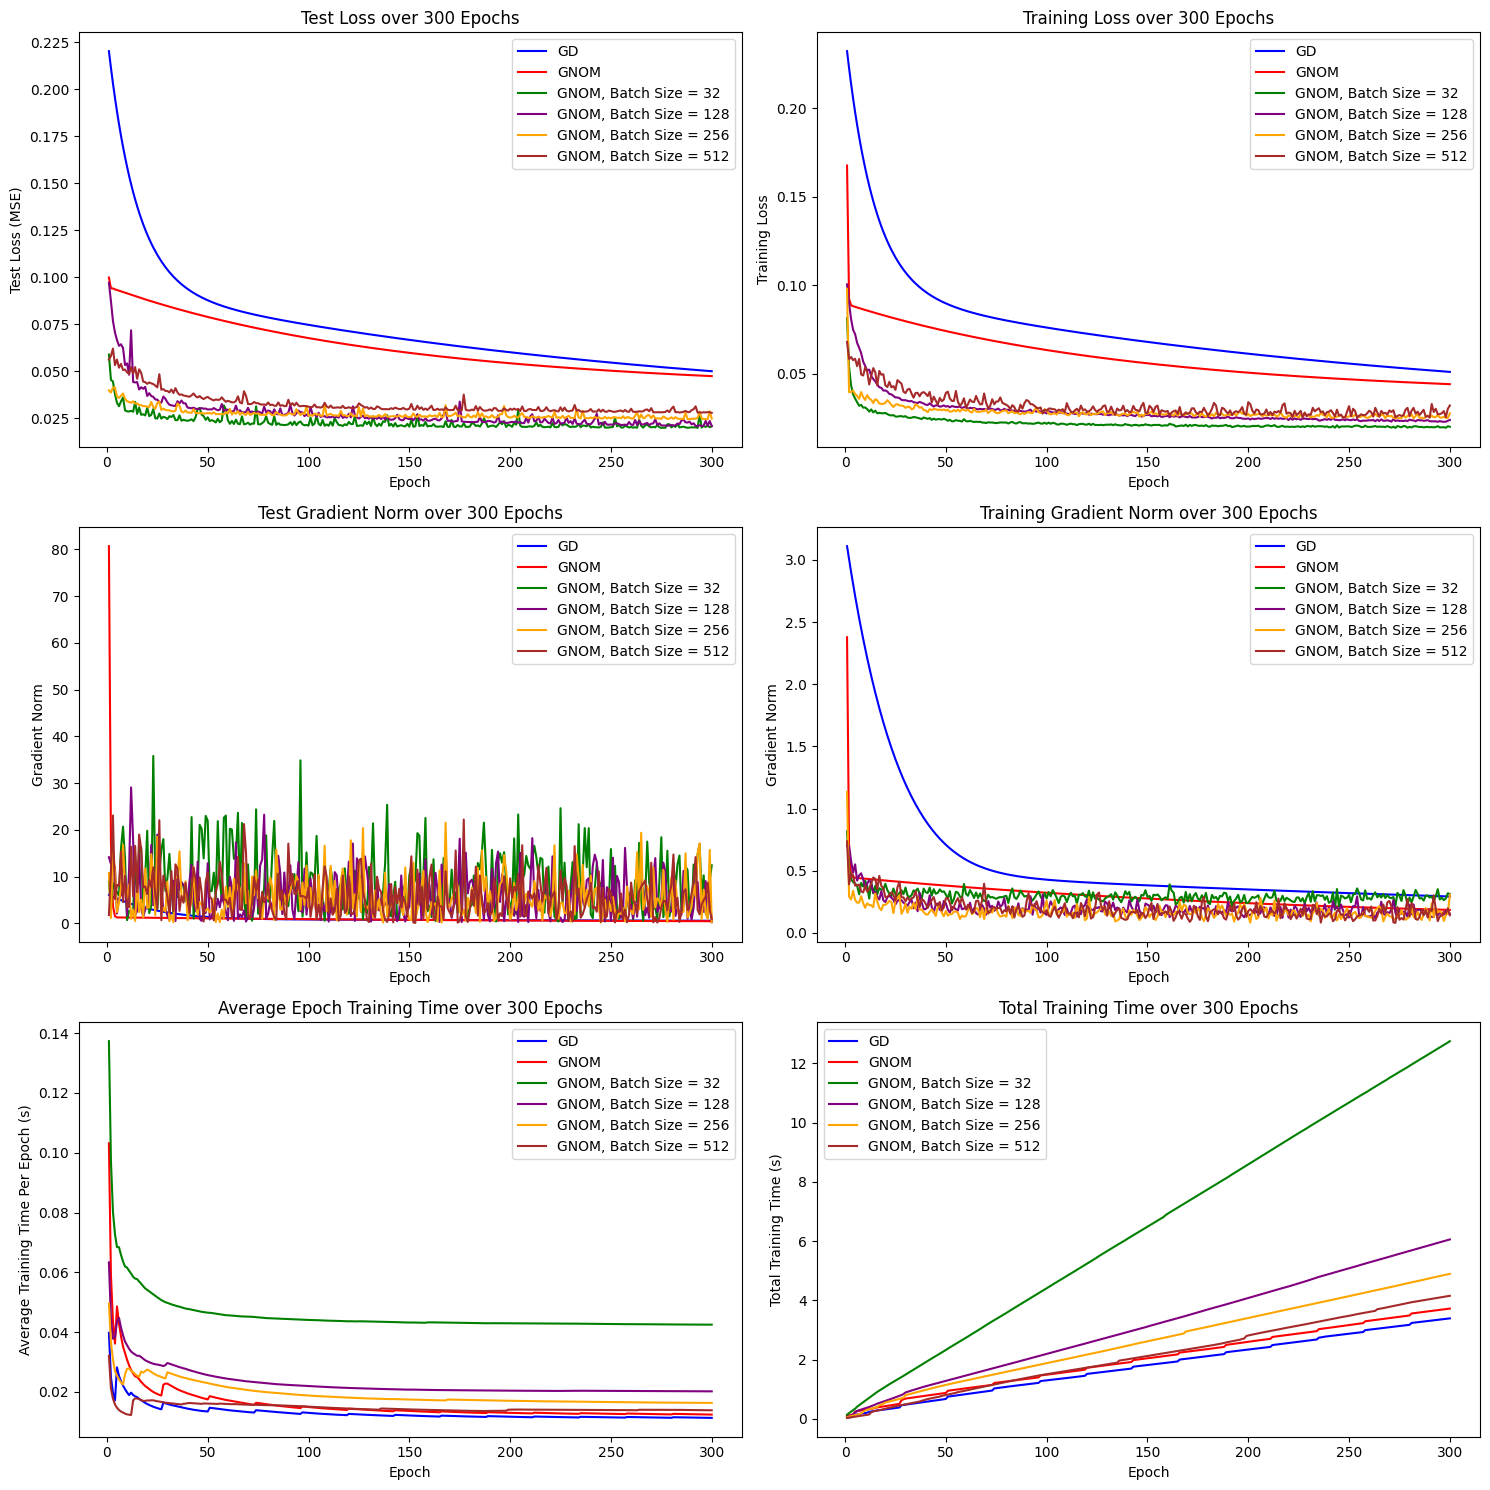

In [40]:
# Extract data for various GNOM batch sizes
GNOM_32_test_loss = GNOM_32['Test Loss']
GNOM_128_test_loss = GNOM_128['Test Loss']
GNOM_256_test_loss = GNOM_256['Test Loss']
GNOM_512_test_loss = GNOM_512['Test Loss']

GNOM_32_training_loss = GNOM_32['Training Loss']
GNOM_128_training_loss = GNOM_128['Training Loss']
GNOM_256_training_loss = GNOM_256['Training Loss']
GNOM_512_training_loss = GNOM_512['Training Loss']

GNOM_32_train_norm = GNOM_32['Training Gradient Norm']
GNOM_128_train_norm = GNOM_128['Training Gradient Norm']
GNOM_256_train_norm = GNOM_256['Training Gradient Norm']
GNOM_512_train_norm = GNOM_512['Training Gradient Norm']

GNOM_32_test_norm = GNOM_32['Test Gradient Norm']
GNOM_128_test_norm = GNOM_128['Test Gradient Norm']
GNOM_256_test_norm = GNOM_256['Test Gradient Norm']
GNOM_512_test_norm = GNOM_512['Test Gradient Norm']

# Calculate average training time (expanding mean) for GNOM variants
GNOM_32_avg_training_time = GNOM_32['Training Time (s)'].expanding().mean()
GNOM_128_avg_training_time = GNOM_128['Training Time (s)'].expanding().mean()
GNOM_256_avg_training_time = GNOM_256['Training Time (s)'].expanding().mean()
GNOM_512_avg_training_time = GNOM_512['Training Time (s)'].expanding().mean()

# Calculate total training time (expanding sum) for GNOM variants
GNOM_32_total_training_time = GNOM_32['Training Time (s)'].expanding().sum()
GNOM_128_total_training_time = GNOM_128['Training Time (s)'].expanding().sum()
GNOM_256_total_training_time = GNOM_256['Training Time (s)'].expanding().sum()
GNOM_512_total_training_time = GNOM_512['Training Time (s)'].expanding().sum()

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Test Loss
axes[0, 0].plot(epochs, GD_test_loss, label='GD', color='blue')
axes[0, 0].plot(epochs, GNOM_test_loss, label='GNOM', color='red')
axes[0, 0].plot(epochs, GNOM_32_test_loss, label='GNOM, Batch Size = 32', color='green')
axes[0, 0].plot(epochs, GNOM_128_test_loss, label='GNOM, Batch Size = 128', color='purple')
axes[0, 0].plot(epochs, GNOM_256_test_loss, label='GNOM, Batch Size = 256', color='orange')
axes[0, 0].plot(epochs, GNOM_512_test_loss, label='GNOM, Batch Size = 512', color='brown')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Test Loss (MSE)')
axes[0, 0].set_title(f'Test Loss over {num_epochs} Epochs')
axes[0, 0].legend()

# Plot 2: Training Loss
axes[0, 1].plot(epochs, GD_training_loss, label='GD', color='blue')
axes[0, 1].plot(epochs, GNOM_training_loss, label='GNOM', color='red')
axes[0, 1].plot(epochs, GNOM_32_training_loss, label='GNOM, Batch Size = 32', color='green')
axes[0, 1].plot(epochs, GNOM_128_training_loss, label='GNOM, Batch Size = 128', color='purple')
axes[0, 1].plot(epochs, GNOM_256_training_loss, label='GNOM, Batch Size = 256', color='orange')
axes[0, 1].plot(epochs, GNOM_512_training_loss, label='GNOM, Batch Size = 512', color='brown')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Training Loss')
axes[0, 1].set_title(f'Training Loss over {num_epochs} Epochs')
axes[0, 1].legend()

# Plot 3: Training Gradient Norm
axes[1, 1].plot(epochs, GD_train_norm, label='GD', color='blue')
axes[1, 1].plot(epochs, GNOM_train_norm, label='GNOM', color='red')
axes[1, 1].plot(epochs, GNOM_32_train_norm, label='GNOM, Batch Size = 32', color='green')
axes[1, 1].plot(epochs, GNOM_128_train_norm, label='GNOM, Batch Size = 128', color='purple')
axes[1, 1].plot(epochs, GNOM_256_train_norm, label='GNOM, Batch Size = 256', color='orange')
axes[1, 1].plot(epochs, GNOM_512_train_norm, label='GNOM, Batch Size = 512', color='brown')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Gradient Norm')
axes[1, 1].set_title(f'Training Gradient Norm over {num_epochs} Epochs')
axes[1, 1].legend()

# Plot 4: Test Gradient Norm
axes[1, 0].plot(epochs, GD_test_norm, label='GD', color='blue')
axes[1, 0].plot(epochs, GNOM_test_norm, label='GNOM', color='red')
axes[1, 0].plot(epochs, GNOM_32_test_norm, label='GNOM, Batch Size = 32', color='green')
axes[1, 0].plot(epochs, GNOM_128_test_norm, label='GNOM, Batch Size = 128', color='purple')
axes[1, 0].plot(epochs, GNOM_256_test_norm, label='GNOM, Batch Size = 256', color='orange')
axes[1, 0].plot(epochs, GNOM_512_test_norm, label='GNOM, Batch Size = 512', color='brown')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Gradient Norm')
axes[1, 0].set_title(f'Test Gradient Norm over {num_epochs} Epochs')
axes[1, 0].legend()

# Plot 5: Average Training Time
axes[2, 0].plot(epochs, GD_avg_training_time, label='GD', color='blue')
axes[2, 0].plot(epochs, GNOM_avg_training_time, label='GNOM', color='red')
axes[2, 0].plot(epochs, GNOM_32_avg_training_time, label='GNOM, Batch Size = 32', color='green')
axes[2, 0].plot(epochs, GNOM_128_avg_training_time, label='GNOM, Batch Size = 128', color='purple')
axes[2, 0].plot(epochs, GNOM_256_avg_training_time, label='GNOM, Batch Size = 256', color='orange')
axes[2, 0].plot(epochs, GNOM_512_avg_training_time, label='GNOM, Batch Size = 512', color='brown')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Average Training Time Per Epoch (s)')
axes[2, 0].set_title(f'Average Epoch Training Time over {num_epochs} Epochs')
axes[2, 0].legend()

# Plot 6: Total Training Time
axes[2, 1].plot(epochs, GD_total_training_time, label='GD', color='blue')
axes[2, 1].plot(epochs, GNOM_total_training_time, label='GNOM', color='red')
axes[2, 1].plot(epochs, GNOM_32_total_training_time, label='GNOM, Batch Size = 32', color='green')
axes[2, 1].plot(epochs, GNOM_128_total_training_time, label='GNOM, Batch Size = 128', color='purple')
axes[2, 1].plot(epochs, GNOM_256_total_training_time, label='GNOM, Batch Size = 256', color='orange')
axes[2, 1].plot(epochs, GNOM_512_total_training_time, label='GNOM, Batch Size = 512', color='brown')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Total Training Time (s)')
axes[2, 1].set_title(f'Total Training Time over {num_epochs} Epochs')
axes[2, 1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


#### GD vs GNOM vs GNOM with batch = 32, 128, 256, 512

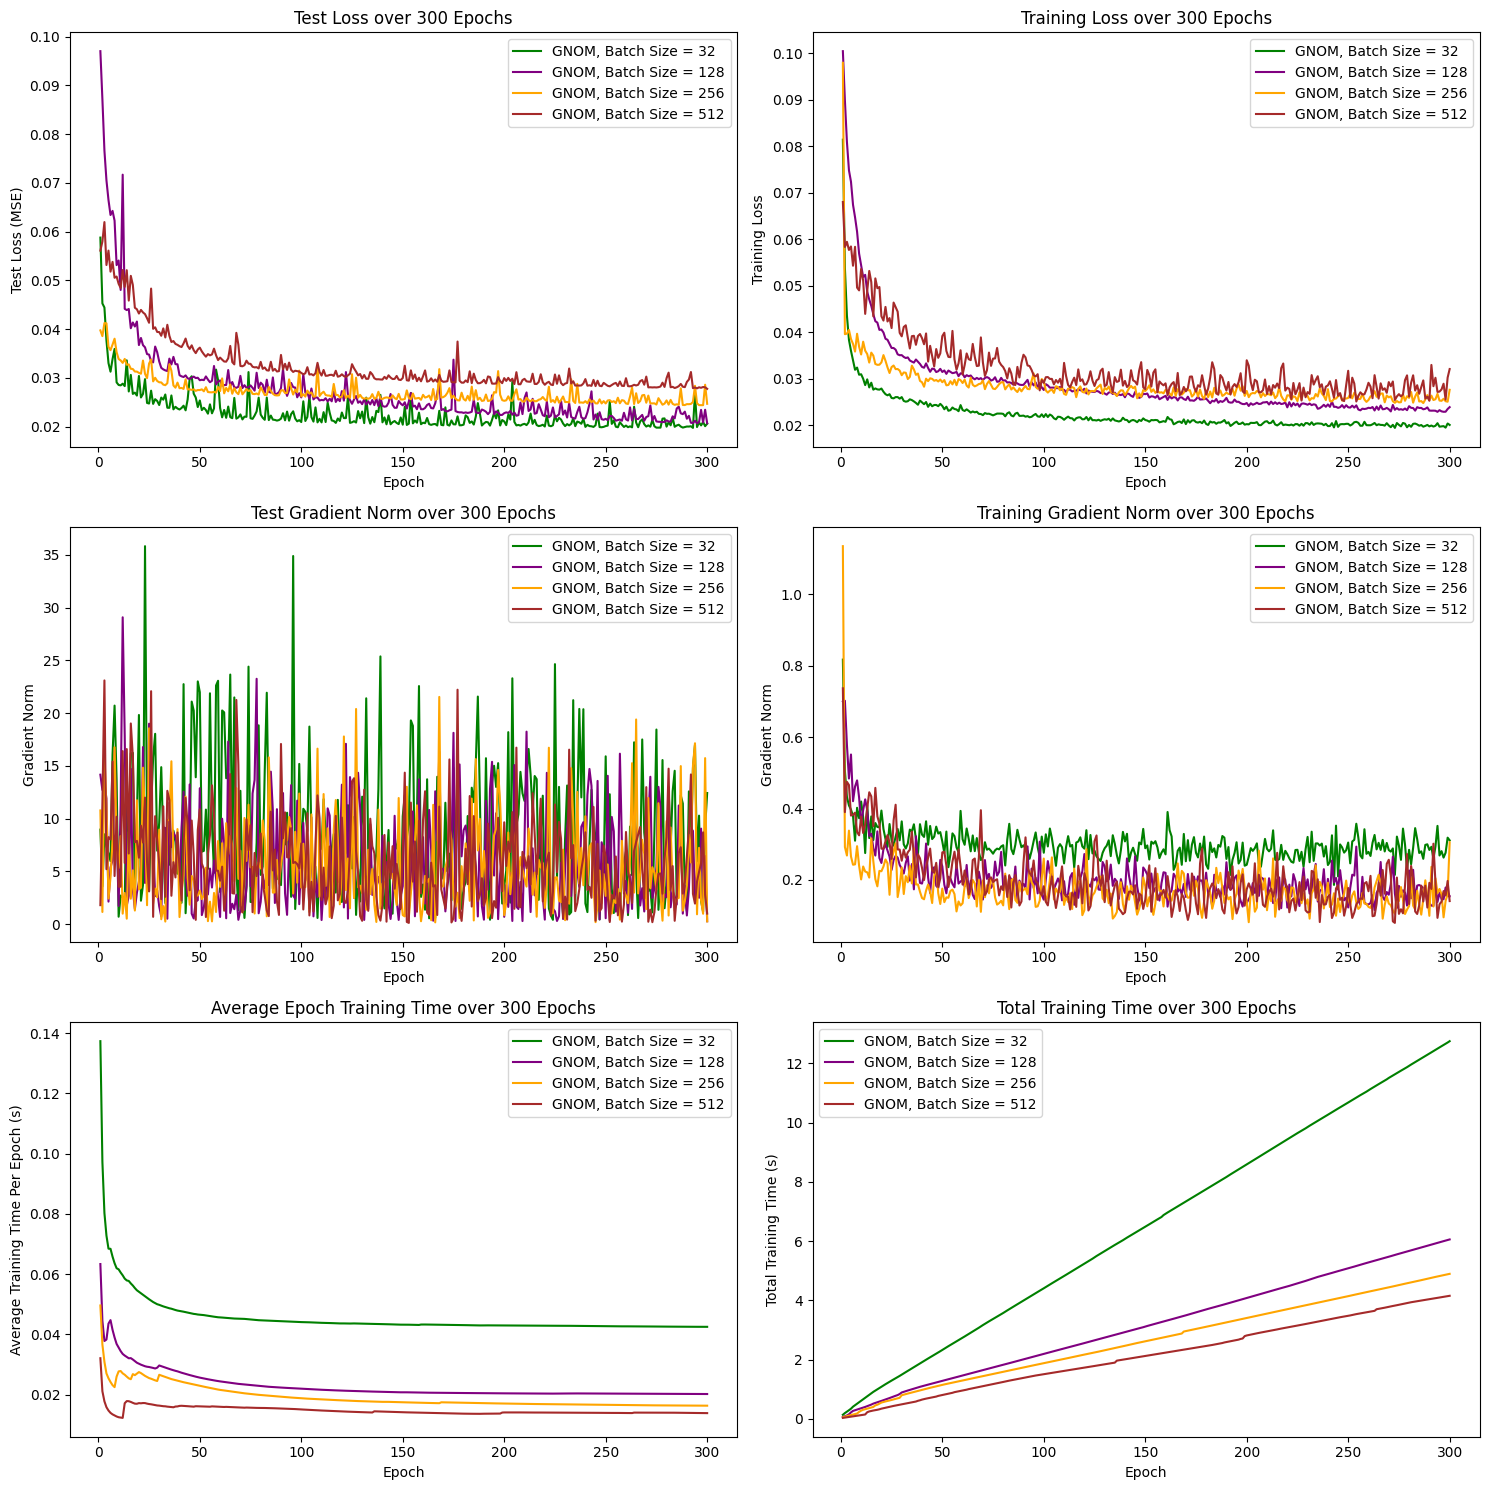

In [41]:
# Extract data for various GNOM batch sizes
GNOM_32_test_loss = GNOM_32['Test Loss']
GNOM_128_test_loss = GNOM_128['Test Loss']
GNOM_256_test_loss = GNOM_256['Test Loss']
GNOM_512_test_loss = GNOM_512['Test Loss']

GNOM_32_training_loss = GNOM_32['Training Loss']
GNOM_128_training_loss = GNOM_128['Training Loss']
GNOM_256_training_loss = GNOM_256['Training Loss']
GNOM_512_training_loss = GNOM_512['Training Loss']

GNOM_32_train_norm = GNOM_32['Training Gradient Norm']
GNOM_128_train_norm = GNOM_128['Training Gradient Norm']
GNOM_256_train_norm = GNOM_256['Training Gradient Norm']
GNOM_512_train_norm = GNOM_512['Training Gradient Norm']

GNOM_32_test_norm = GNOM_32['Test Gradient Norm']
GNOM_128_test_norm = GNOM_128['Test Gradient Norm']
GNOM_256_test_norm = GNOM_256['Test Gradient Norm']
GNOM_512_test_norm = GNOM_512['Test Gradient Norm']

# Calculate average training time (expanding mean) for GNOM variants
GNOM_32_avg_training_time = GNOM_32['Training Time (s)'].expanding().mean()
GNOM_128_avg_training_time = GNOM_128['Training Time (s)'].expanding().mean()
GNOM_256_avg_training_time = GNOM_256['Training Time (s)'].expanding().mean()
GNOM_512_avg_training_time = GNOM_512['Training Time (s)'].expanding().mean()

# Calculate total training time (expanding sum) for GNOM variants
GNOM_32_total_training_time = GNOM_32['Training Time (s)'].expanding().sum()
GNOM_128_total_training_time = GNOM_128['Training Time (s)'].expanding().sum()
GNOM_256_total_training_time = GNOM_256['Training Time (s)'].expanding().sum()
GNOM_512_total_training_time = GNOM_512['Training Time (s)'].expanding().sum()

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Test Loss
axes[0, 0].plot(epochs, GNOM_32_test_loss, label='GNOM, Batch Size = 32', color='green')
axes[0, 0].plot(epochs, GNOM_128_test_loss, label='GNOM, Batch Size = 128', color='purple')
axes[0, 0].plot(epochs, GNOM_256_test_loss, label='GNOM, Batch Size = 256', color='orange')
axes[0, 0].plot(epochs, GNOM_512_test_loss, label='GNOM, Batch Size = 512', color='brown')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Test Loss (MSE)')
axes[0, 0].set_title(f'Test Loss over {num_epochs} Epochs')
axes[0, 0].legend()

# Plot 2: Training Loss
axes[0, 1].plot(epochs, GNOM_32_training_loss, label='GNOM, Batch Size = 32', color='green')
axes[0, 1].plot(epochs, GNOM_128_training_loss, label='GNOM, Batch Size = 128', color='purple')
axes[0, 1].plot(epochs, GNOM_256_training_loss, label='GNOM, Batch Size = 256', color='orange')
axes[0, 1].plot(epochs, GNOM_512_training_loss, label='GNOM, Batch Size = 512', color='brown')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Training Loss')
axes[0, 1].set_title(f'Training Loss over {num_epochs} Epochs')
axes[0, 1].legend()

# Plot 3: Training Gradient Norm
axes[1, 1].plot(epochs, GNOM_32_train_norm, label='GNOM, Batch Size = 32', color='green')
axes[1, 1].plot(epochs, GNOM_128_train_norm, label='GNOM, Batch Size = 128', color='purple')
axes[1, 1].plot(epochs, GNOM_256_train_norm, label='GNOM, Batch Size = 256', color='orange')
axes[1, 1].plot(epochs, GNOM_512_train_norm, label='GNOM, Batch Size = 512', color='brown')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Gradient Norm')
axes[1, 1].set_title(f'Training Gradient Norm over {num_epochs} Epochs')
axes[1, 1].legend()

# Plot 4: Test Gradient Norm
axes[1, 0].plot(epochs, GNOM_32_test_norm, label='GNOM, Batch Size = 32', color='green')
axes[1, 0].plot(epochs, GNOM_128_test_norm, label='GNOM, Batch Size = 128', color='purple')
axes[1, 0].plot(epochs, GNOM_256_test_norm, label='GNOM, Batch Size = 256', color='orange')
axes[1, 0].plot(epochs, GNOM_512_test_norm, label='GNOM, Batch Size = 512', color='brown')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Gradient Norm')
axes[1, 0].set_title(f'Test Gradient Norm over {num_epochs} Epochs')
axes[1, 0].legend()

# Plot 5: Average Training Time
axes[2, 0].plot(epochs, GNOM_32_avg_training_time, label='GNOM, Batch Size = 32', color='green')
axes[2, 0].plot(epochs, GNOM_128_avg_training_time, label='GNOM, Batch Size = 128', color='purple')
axes[2, 0].plot(epochs, GNOM_256_avg_training_time, label='GNOM, Batch Size = 256', color='orange')
axes[2, 0].plot(epochs, GNOM_512_avg_training_time, label='GNOM, Batch Size = 512', color='brown')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Average Training Time Per Epoch (s)')
axes[2, 0].set_title(f'Average Epoch Training Time over {num_epochs} Epochs')
axes[2, 0].legend()

# Plot 6: Total Training Time
axes[2, 1].plot(epochs, GNOM_32_total_training_time, label='GNOM, Batch Size = 32', color='green')
axes[2, 1].plot(epochs, GNOM_128_total_training_time, label='GNOM, Batch Size = 128', color='purple')
axes[2, 1].plot(epochs, GNOM_256_total_training_time, label='GNOM, Batch Size = 256', color='orange')
axes[2, 1].plot(epochs, GNOM_512_total_training_time, label='GNOM, Batch Size = 512', color='brown')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Total Training Time (s)')
axes[2, 1].set_title(f'Total Training Time over {num_epochs} Epochs')
axes[2, 1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


#### GNOM 500 epochs, lr = 0.001, 0.0005, 0.0001, 0.00001

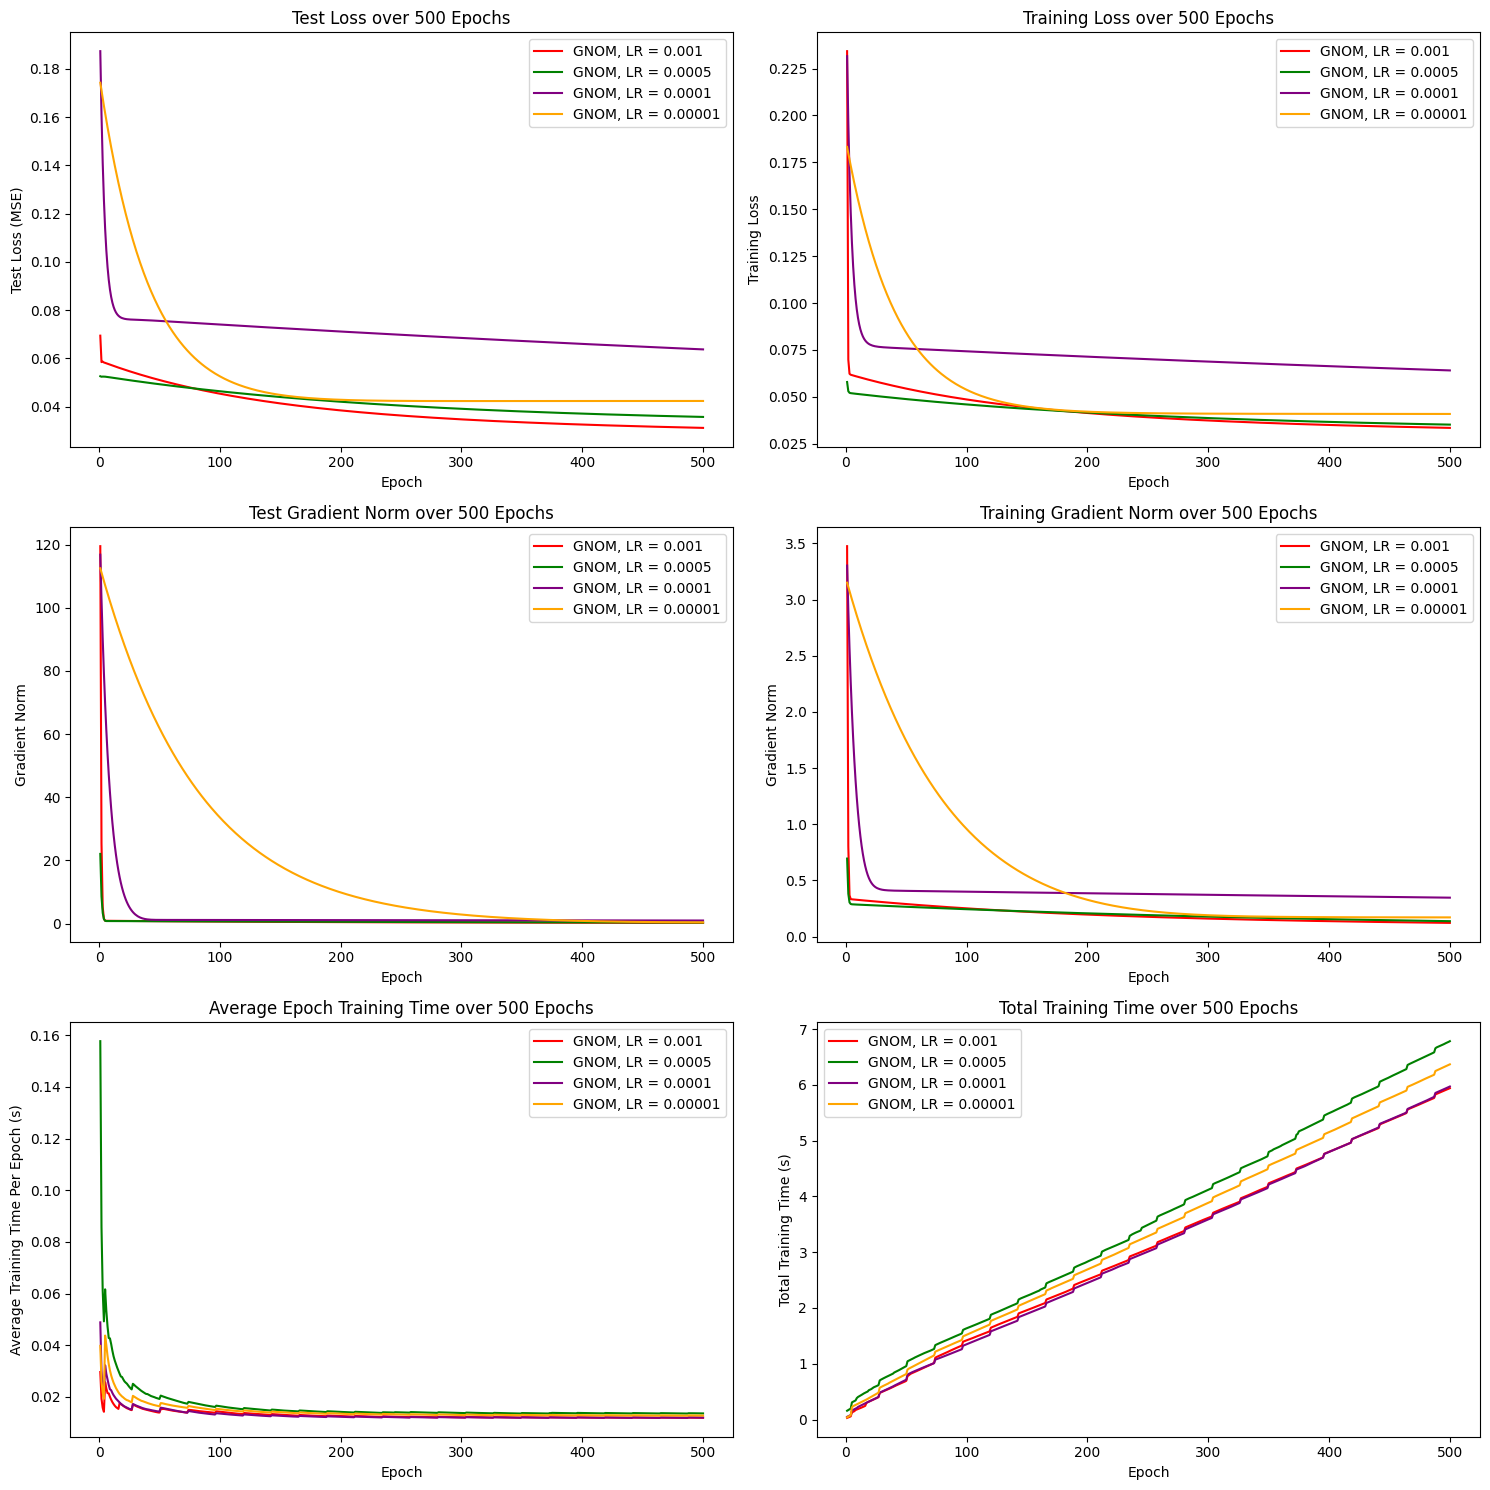

In [48]:
# Extract data from DataFrames
epochs = GNOM_001_stats['Epoch']
num_epochs = len(epochs)

# Extract data for various learning rates
GNOM_001_test_loss = GNOM_001_stats['Test Loss']
GNOM_0005_test_loss = GNOM_0005_stats['Test Loss']
GNOM_0001_test_loss = GNOM_0001_stats['Test Loss']
GNOM_00001_test_loss = GNOM_00001_stats['Test Loss']

GNOM_001_training_loss = GNOM_001_stats['Training Loss']
GNOM_0005_training_loss = GNOM_0005_stats['Training Loss']
GNOM_0001_training_loss = GNOM_0001_stats['Training Loss']
GNOM_00001_training_loss = GNOM_00001_stats['Training Loss']

GNOM_001_train_norm = GNOM_001_stats['Training Gradient Norm']
GNOM_0005_train_norm = GNOM_0005_stats['Training Gradient Norm']
GNOM_0001_train_norm = GNOM_0001_stats['Training Gradient Norm']
GNOM_00001_train_norm = GNOM_00001_stats['Training Gradient Norm']

GNOM_001_test_norm = GNOM_001_stats['Test Gradient Norm']
GNOM_0005_test_norm = GNOM_0005_stats['Test Gradient Norm']
GNOM_0001_test_norm = GNOM_0001_stats['Test Gradient Norm']
GNOM_00001_test_norm = GNOM_00001_stats['Test Gradient Norm']

# Calculate average training time (expanding mean) for GNOM variants
GNOM_001_avg_training_time = GNOM_001_stats['Training Time (s)'].expanding().mean()
GNOM_0005_avg_training_time = GNOM_0005_stats['Training Time (s)'].expanding().mean()
GNOM_0001_avg_training_time = GNOM_0001_stats['Training Time (s)'].expanding().mean()
GNOM_00001_avg_training_time = GNOM_00001_stats['Training Time (s)'].expanding().mean()

# Calculate total training time (expanding sum) for GNOM variants
GNOM_001_total_training_time = GNOM_001_stats['Training Time (s)'].expanding().sum()
GNOM_0005_total_training_time = GNOM_0005_stats['Training Time (s)'].expanding().sum()
GNOM_0001_total_training_time = GNOM_0001_stats['Training Time (s)'].expanding().sum()
GNOM_00001_total_training_time = GNOM_00001_stats['Training Time (s)'].expanding().sum()

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Test Loss
axes[0, 0].plot(epochs, GNOM_001_test_loss, label='GNOM, LR = 0.001', color='red')
axes[0, 0].plot(epochs, GNOM_0005_test_loss, label='GNOM, LR = 0.0005', color='green')
axes[0, 0].plot(epochs, GNOM_0001_test_loss, label='GNOM, LR = 0.0001', color='purple')
axes[0, 0].plot(epochs, GNOM_00001_test_loss, label='GNOM, LR = 0.00001', color='orange')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Test Loss (MSE)')
axes[0, 0].set_title(f'Test Loss over {num_epochs} Epochs')
axes[0, 0].legend()

# Plot 2: Training Loss
axes[0, 1].plot(epochs, GNOM_001_training_loss, label='GNOM, LR = 0.001', color='red')
axes[0, 1].plot(epochs, GNOM_0005_training_loss, label='GNOM, LR = 0.0005', color='green')
axes[0, 1].plot(epochs, GNOM_0001_training_loss, label='GNOM, LR = 0.0001', color='purple')
axes[0, 1].plot(epochs, GNOM_00001_training_loss, label='GNOM, LR = 0.00001', color='orange')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Training Loss')
axes[0, 1].set_title(f'Training Loss over {num_epochs} Epochs')
axes[0, 1].legend()

# Plot 3: Training Gradient Norm
axes[1, 1].plot(epochs, GNOM_001_train_norm, label='GNOM, LR = 0.001', color='red')
axes[1, 1].plot(epochs, GNOM_0005_train_norm, label='GNOM, LR = 0.0005', color='green')
axes[1, 1].plot(epochs, GNOM_0001_train_norm, label='GNOM, LR = 0.0001', color='purple')
axes[1, 1].plot(epochs, GNOM_00001_train_norm, label='GNOM, LR = 0.00001', color='orange')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Gradient Norm')
axes[1, 1].set_title(f'Training Gradient Norm over {num_epochs} Epochs')
axes[1, 1].legend()

# Plot 4: Test Gradient Norm
axes[1, 0].plot(epochs, GNOM_001_test_norm, label='GNOM, LR = 0.001', color='red')
axes[1, 0].plot(epochs, GNOM_0005_test_norm, label='GNOM, LR = 0.0005', color='green')
axes[1, 0].plot(epochs, GNOM_0001_test_norm, label='GNOM, LR = 0.0001', color='purple')
axes[1, 0].plot(epochs, GNOM_00001_test_norm, label='GNOM, LR = 0.00001', color='orange')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Gradient Norm')
axes[1, 0].set_title(f'Test Gradient Norm over {num_epochs} Epochs')
axes[1, 0].legend()

# Plot 5: Average Training Time
axes[2, 0].plot(epochs, GNOM_001_avg_training_time, label='GNOM, LR = 0.001', color='red')
axes[2, 0].plot(epochs, GNOM_0005_avg_training_time, label='GNOM, LR = 0.0005', color='green')
axes[2, 0].plot(epochs, GNOM_0001_avg_training_time, label='GNOM, LR = 0.0001', color='purple')
axes[2, 0].plot(epochs, GNOM_00001_avg_training_time, label='GNOM, LR = 0.00001', color='orange')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Average Training Time Per Epoch (s)')
axes[2, 0].set_title(f'Average Epoch Training Time over {num_epochs} Epochs')
axes[2, 0].legend()

# Plot 6: Total Training Time
axes[2, 1].plot(epochs, GNOM_001_total_training_time, label='GNOM, LR = 0.001', color='red')
axes[2, 1].plot(epochs, GNOM_0005_total_training_time, label='GNOM, LR = 0.0005', color='green')
axes[2, 1].plot(epochs, GNOM_0001_total_training_time, label='GNOM, LR = 0.0001', color='purple')
axes[2, 1].plot(epochs, GNOM_00001_total_training_time, label='GNOM, LR = 0.00001', color='orange')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Total Training Time (s)')
axes[2, 1].set_title(f'Total Training Time over {num_epochs} Epochs')
axes[2, 1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


#### SGD Grid Search 200 epochs, lr = 0.1, 0.05, 0.01, 0.005, 0.001

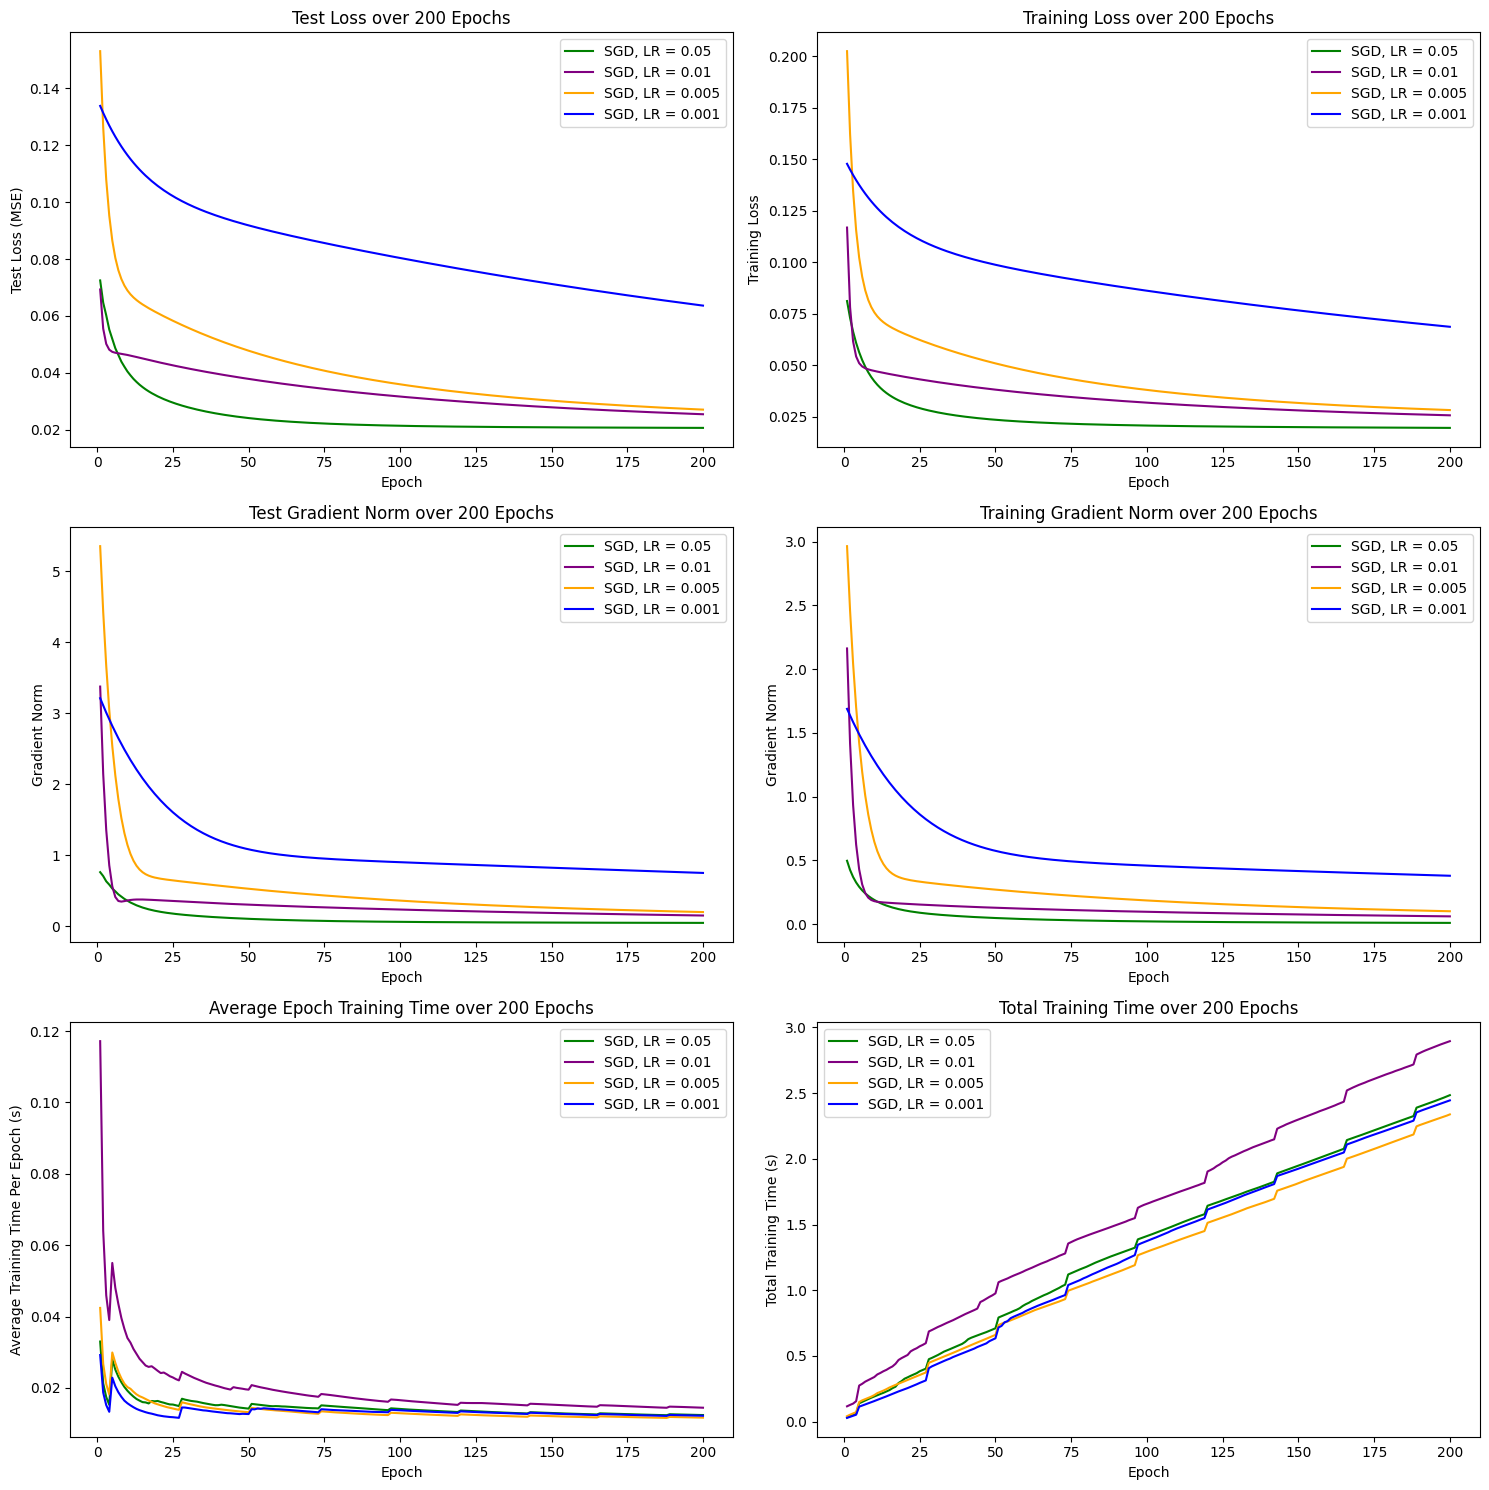

In [5]:
# Extract data from DataFrames
epochs = SGD_01_stats['Epoch']
num_epochs = len(epochs)

# Extract data for various learning rates
SGD_01_test_loss = SGD_01_stats['Test Loss']
SGD_005_test_loss = SGD_005_stats['Test Loss']
SGD_001_test_loss = SGD_001_stats['Test Loss']
SGD_0005_test_loss = SGD_0005_stats['Test Loss']
SGD_0001_test_loss = SGD_0001_stats['Test Loss']

SGD_01_training_loss = SGD_01_stats['Training Loss']
SGD_005_training_loss = SGD_005_stats['Training Loss']
SGD_001_training_loss = SGD_001_stats['Training Loss']
SGD_0005_training_loss = SGD_0005_stats['Training Loss']
SGD_0001_training_loss = SGD_0001_stats['Training Loss']

SGD_01_train_norm = SGD_01_stats['Training Gradient Norm']
SGD_005_train_norm = SGD_005_stats['Training Gradient Norm']
SGD_001_train_norm = SGD_001_stats['Training Gradient Norm']
SGD_0005_train_norm = SGD_0005_stats['Training Gradient Norm']
SGD_0001_train_norm = SGD_0001_stats['Training Gradient Norm']

SGD_01_test_norm = SGD_01_stats['Test Gradient Norm']
SGD_005_test_norm = SGD_005_stats['Test Gradient Norm']
SGD_001_test_norm = SGD_001_stats['Test Gradient Norm']
SGD_0005_test_norm = SGD_0005_stats['Test Gradient Norm']
SGD_0001_test_norm = SGD_0001_stats['Test Gradient Norm']

# Calculate average training time (expanding mean) for SGD variants
SGD_01_avg_training_time = SGD_01_stats['Training Time (s)'].expanding().mean()
SGD_005_avg_training_time = SGD_005_stats['Training Time (s)'].expanding().mean()
SGD_001_avg_training_time = SGD_001_stats['Training Time (s)'].expanding().mean()
SGD_0005_avg_training_time = SGD_0005_stats['Training Time (s)'].expanding().mean()
SGD_0001_avg_training_time = SGD_0001_stats['Training Time (s)'].expanding().mean()

# Calculate total training time (expanding sum) for SGD variants
SGD_01_total_training_time = SGD_01_stats['Training Time (s)'].expanding().sum()
SGD_005_total_training_time = SGD_005_stats['Training Time (s)'].expanding().sum()
SGD_001_total_training_time = SGD_001_stats['Training Time (s)'].expanding().sum()
SGD_0005_total_training_time = SGD_0005_stats['Training Time (s)'].expanding().sum()
SGD_0001_total_training_time = SGD_0001_stats['Training Time (s)'].expanding().sum()

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Test Loss
# axes[0, 0].plot(epochs, SGD_01_test_loss, label='SGD, LR = 0.1', color='red')
axes[0, 0].plot(epochs, SGD_005_test_loss, label='SGD, LR = 0.05', color='green')
axes[0, 0].plot(epochs, SGD_001_test_loss, label='SGD, LR = 0.01', color='purple')
axes[0, 0].plot(epochs, SGD_0005_test_loss, label='SGD, LR = 0.005', color='orange')
axes[0, 0].plot(epochs, SGD_0001_test_loss, label='SGD, LR = 0.001', color='blue')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Test Loss (MSE)')
axes[0, 0].set_title(f'Test Loss over {num_epochs} Epochs')
axes[0, 0].legend()

# Plot 2: Training Loss
# axes[0, 1].plot(epochs, SGD_01_training_loss, label='SGD, LR = 0.1', color='red')
axes[0, 1].plot(epochs, SGD_005_training_loss, label='SGD, LR = 0.05', color='green')
axes[0, 1].plot(epochs, SGD_001_training_loss, label='SGD, LR = 0.01', color='purple')
axes[0, 1].plot(epochs, SGD_0005_training_loss, label='SGD, LR = 0.005', color='orange')
axes[0, 1].plot(epochs, SGD_0001_training_loss, label='SGD, LR = 0.001', color='blue')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Training Loss')
axes[0, 1].set_title(f'Training Loss over {num_epochs} Epochs')
axes[0, 1].legend()

# Plot 3: Training Gradient Norm
# axes[1, 1].plot(epochs, SGD_01_train_norm, label='SGD, LR = 0.1', color='red')
axes[1, 1].plot(epochs, SGD_005_train_norm, label='SGD, LR = 0.05', color='green')
axes[1, 1].plot(epochs, SGD_001_train_norm, label='SGD, LR = 0.01', color='purple')
axes[1, 1].plot(epochs, SGD_0005_train_norm, label='SGD, LR = 0.005', color='orange')
axes[1, 1].plot(epochs, SGD_0001_train_norm, label='SGD, LR = 0.001', color='blue')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Gradient Norm')
axes[1, 1].set_title(f'Training Gradient Norm over {num_epochs} Epochs')
axes[1, 1].legend()

# Plot 4: Test Gradient Norm
# axes[1, 0].plot(epochs, SGD_01_test_norm, label='SGD, LR = 0.1', color='red')
axes[1, 0].plot(epochs, SGD_005_test_norm, label='SGD, LR = 0.05', color='green')
axes[1, 0].plot(epochs, SGD_001_test_norm, label='SGD, LR = 0.01', color='purple')
axes[1, 0].plot(epochs, SGD_0005_test_norm, label='SGD, LR = 0.005', color='orange')
axes[1, 0].plot(epochs, SGD_0001_test_norm, label='SGD, LR = 0.001', color='blue')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Gradient Norm')
axes[1, 0].set_title(f'Test Gradient Norm over {num_epochs} Epochs')
axes[1, 0].legend()

# Plot 5: Average Training Time
# axes[2, 0].plot(epochs, SGD_01_avg_training_time, label='SGD, LR = 0.1', color='red')
axes[2, 0].plot(epochs, SGD_005_avg_training_time, label='SGD, LR = 0.05', color='green')
axes[2, 0].plot(epochs, SGD_001_avg_training_time, label='SGD, LR = 0.01', color='purple')
axes[2, 0].plot(epochs, SGD_0005_avg_training_time, label='SGD, LR = 0.005', color='orange')
axes[2, 0].plot(epochs, SGD_0001_avg_training_time, label='SGD, LR = 0.001', color='blue')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Average Training Time Per Epoch (s)')
axes[2, 0].set_title(f'Average Epoch Training Time over {num_epochs} Epochs')
axes[2, 0].legend()

# Plot 6: Total Training Time
# axes[2, 1].plot(epochs, SGD_01_total_training_time, label='SGD, LR = 0.1', color='red')
axes[2, 1].plot(epochs, SGD_005_total_training_time, label='SGD, LR = 0.05', color='green')
axes[2, 1].plot(epochs, SGD_001_total_training_time, label='SGD, LR = 0.01', color='purple')
axes[2, 1].plot(epochs, SGD_0005_total_training_time, label='SGD, LR = 0.005', color='orange')
axes[2, 1].plot(epochs, SGD_0001_total_training_time, label='SGD, LR = 0.001', color='blue')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Total Training Time (s)')
axes[2, 1].set_title(f'Total Training Time over {num_epochs} Epochs')
axes[2, 1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()



#### Further SGD Grid Search with lr = 0.055, 0.05, 0.025, 0.01

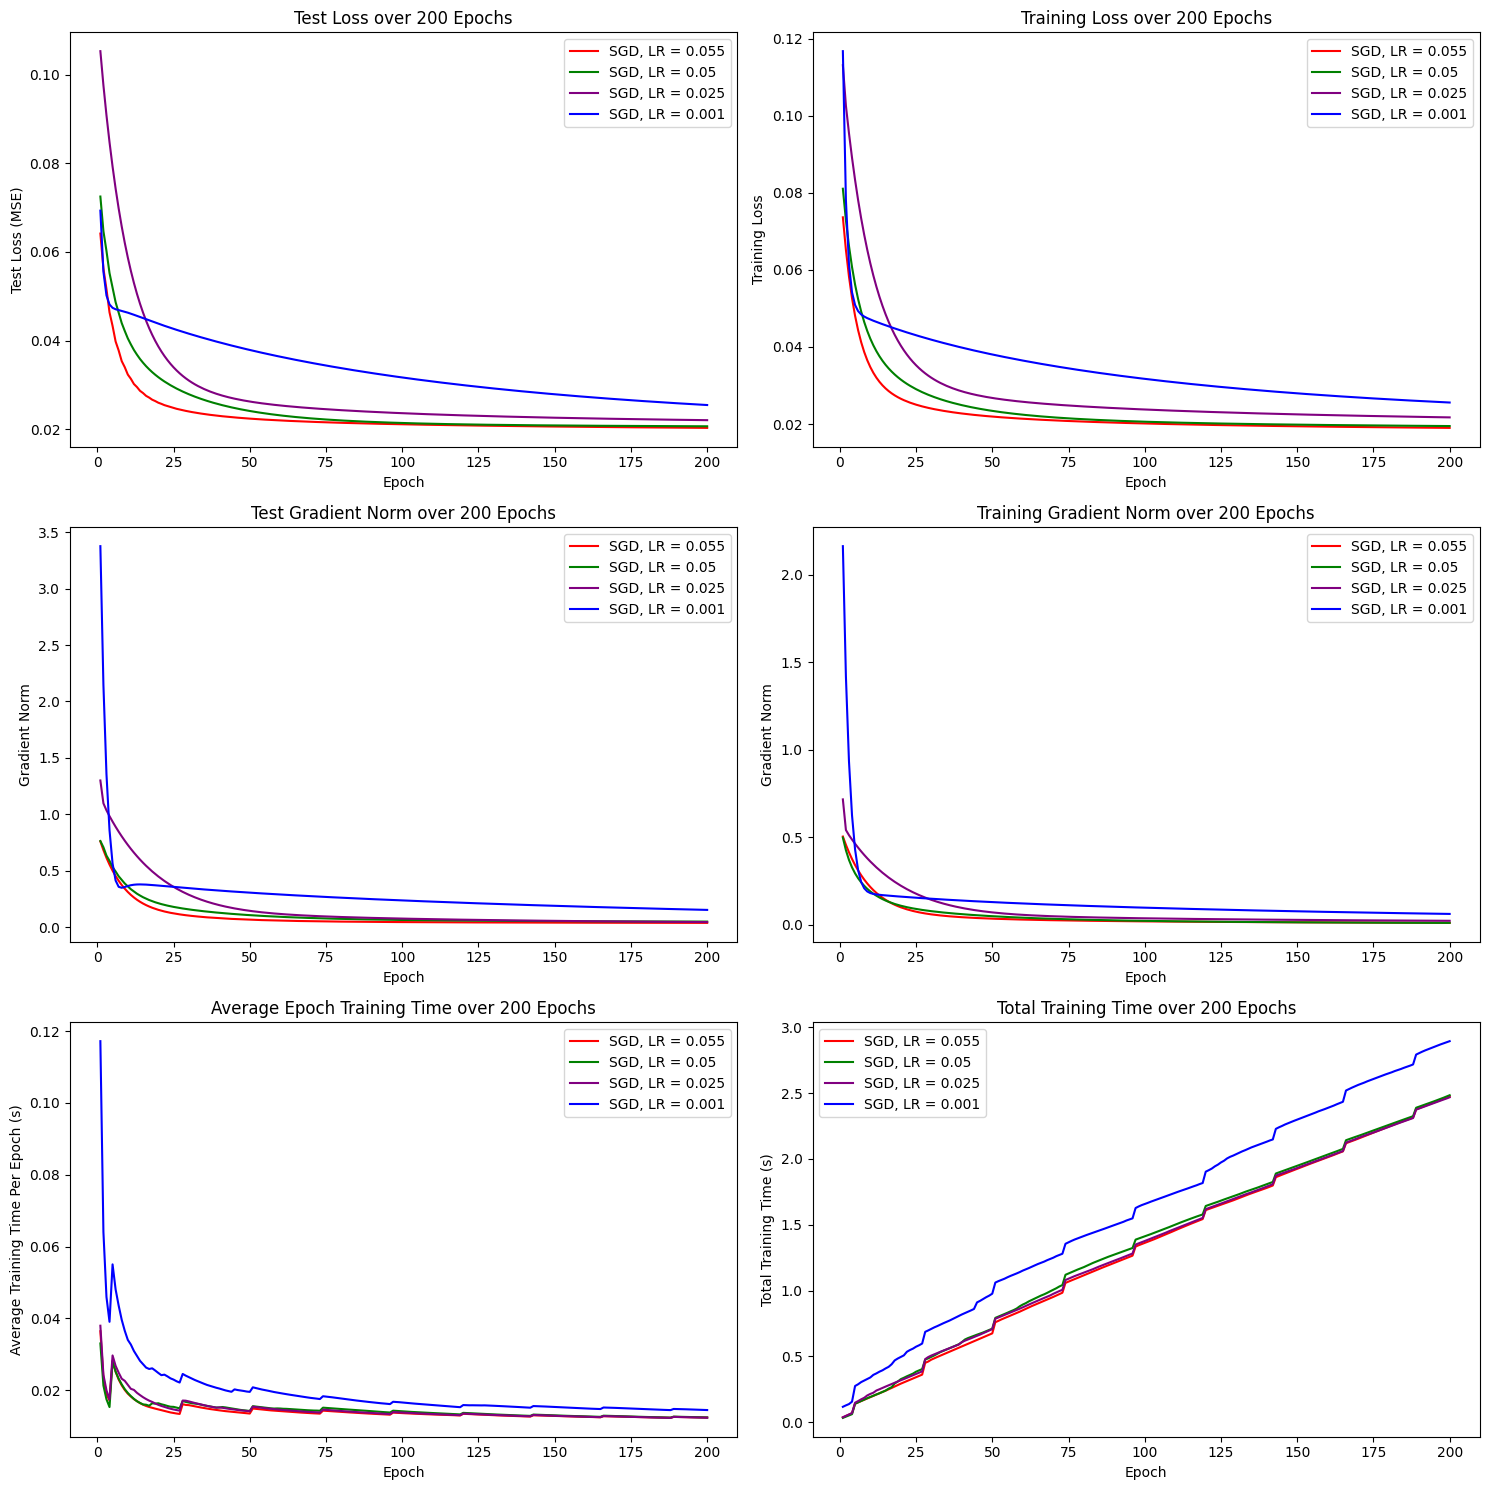

In [7]:
# Extract data from DataFrames
epochs = SGD_0055_stats['Epoch']  # Assuming all have the same epochs

# Extract data for the new learning rates
SGD_0055_test_loss = SGD_0055_stats['Test Loss']
SGD_0025_test_loss = SGD_0025_stats['Test Loss']
SGD_005_test_loss = SGD_005_stats['Test Loss']
SGD_001_test_loss = SGD_001_stats['Test Loss']

SGD_0055_training_loss = SGD_0055_stats['Training Loss']
SGD_0025_training_loss = SGD_0025_stats['Training Loss']
SGD_005_training_loss = SGD_005_stats['Training Loss']
SGD_001_training_loss = SGD_001_stats['Training Loss']

SGD_0055_train_norm = SGD_0055_stats['Training Gradient Norm']
SGD_0025_train_norm = SGD_0025_stats['Training Gradient Norm']
SGD_005_train_norm = SGD_005_stats['Training Gradient Norm']
SGD_001_train_norm = SGD_001_stats['Training Gradient Norm']

SGD_0055_test_norm = SGD_0055_stats['Test Gradient Norm']
SGD_0025_test_norm = SGD_0025_stats['Test Gradient Norm']
SGD_005_test_norm = SGD_005_stats['Test Gradient Norm']
SGD_001_test_norm = SGD_001_stats['Test Gradient Norm']

# Calculate average training time (expanding mean) for these learning rates
SGD_0055_avg_training_time = SGD_0055_stats['Training Time (s)'].expanding().mean()
SGD_0025_avg_training_time = SGD_0025_stats['Training Time (s)'].expanding().mean()
SGD_005_avg_training_time = SGD_005_stats['Training Time (s)'].expanding().mean()
SGD_001_avg_training_time = SGD_001_stats['Training Time (s)'].expanding().mean()

# Calculate total training time (expanding sum) for these learning rates
SGD_0055_total_training_time = SGD_0055_stats['Training Time (s)'].expanding().sum()
SGD_0025_total_training_time = SGD_0025_stats['Training Time (s)'].expanding().sum()
SGD_005_total_training_time = SGD_005_stats['Training Time (s)'].expanding().sum()
SGD_001_total_training_time = SGD_001_stats['Training Time (s)'].expanding().sum()

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Test Loss
axes[0, 0].plot(epochs, SGD_0055_test_loss, label='SGD, LR = 0.055', color='red')
axes[0, 0].plot(epochs, SGD_005_test_loss, label='SGD, LR = 0.05', color='green')
axes[0, 0].plot(epochs, SGD_0025_test_loss, label='SGD, LR = 0.025', color='purple')
axes[0, 0].plot(epochs, SGD_001_test_loss, label='SGD, LR = 0.001', color='blue')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Test Loss (MSE)')
axes[0, 0].set_title(f'Test Loss over {len(epochs)} Epochs')
axes[0, 0].legend()

# Plot 2: Training Loss
axes[0, 1].plot(epochs, SGD_0055_training_loss, label='SGD, LR = 0.055', color='red')
axes[0, 1].plot(epochs, SGD_005_training_loss, label='SGD, LR = 0.05', color='green')
axes[0, 1].plot(epochs, SGD_0025_training_loss, label='SGD, LR = 0.025', color='purple')
axes[0, 1].plot(epochs, SGD_001_training_loss, label='SGD, LR = 0.001', color='blue')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Training Loss')
axes[0, 1].set_title(f'Training Loss over {len(epochs)} Epochs')
axes[0, 1].legend()

# Plot 3: Training Gradient Norm
axes[1, 1].plot(epochs, SGD_0055_train_norm, label='SGD, LR = 0.055', color='red')
axes[1, 1].plot(epochs, SGD_005_train_norm, label='SGD, LR = 0.05', color='green')
axes[1, 1].plot(epochs, SGD_0025_train_norm, label='SGD, LR = 0.025', color='purple')
axes[1, 1].plot(epochs, SGD_001_train_norm, label='SGD, LR = 0.001', color='blue')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Gradient Norm')
axes[1, 1].set_title(f'Training Gradient Norm over {len(epochs)} Epochs')
axes[1, 1].legend()

# Plot 4: Test Gradient Norm
axes[1, 0].plot(epochs, SGD_0055_test_norm, label='SGD, LR = 0.055', color='red')
axes[1, 0].plot(epochs, SGD_005_test_norm, label='SGD, LR = 0.05', color='green')
axes[1, 0].plot(epochs, SGD_0025_test_norm, label='SGD, LR = 0.025', color='purple')
axes[1, 0].plot(epochs, SGD_001_test_norm, label='SGD, LR = 0.001', color='blue')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Gradient Norm')
axes[1, 0].set_title(f'Test Gradient Norm over {len(epochs)} Epochs')
axes[1, 0].legend()

# Plot 5: Average Training Time
axes[2, 0].plot(epochs, SGD_0055_avg_training_time, label='SGD, LR = 0.055', color='red')
axes[2, 0].plot(epochs, SGD_005_avg_training_time, label='SGD, LR = 0.05', color='green')
axes[2, 0].plot(epochs, SGD_0025_avg_training_time, label='SGD, LR = 0.025', color='purple')
axes[2, 0].plot(epochs, SGD_001_avg_training_time, label='SGD, LR = 0.001', color='blue')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Average Training Time Per Epoch (s)')
axes[2, 0].set_title(f'Average Epoch Training Time over {len(epochs)} Epochs')
axes[2, 0].legend()

# Plot 6: Total Training Time
axes[2, 1].plot(epochs, SGD_0055_total_training_time, label='SGD, LR = 0.055', color='red')
axes[2, 1].plot(epochs, SGD_005_total_training_time, label='SGD, LR = 0.05', color='green')
axes[2, 1].plot(epochs, SGD_0025_total_training_time, label='SGD, LR = 0.025', color='purple')
axes[2, 1].plot(epochs, SGD_001_total_training_time, label='SGD, LR = 0.001', color='blue')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Total Training Time (s)')
axes[2, 1].set_title(f'Total Training Time over {len(epochs)} Epochs')
axes[2, 1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


#### SGD Batch Size Search with lr = 0.055, batch = 32, 128, 256, 512

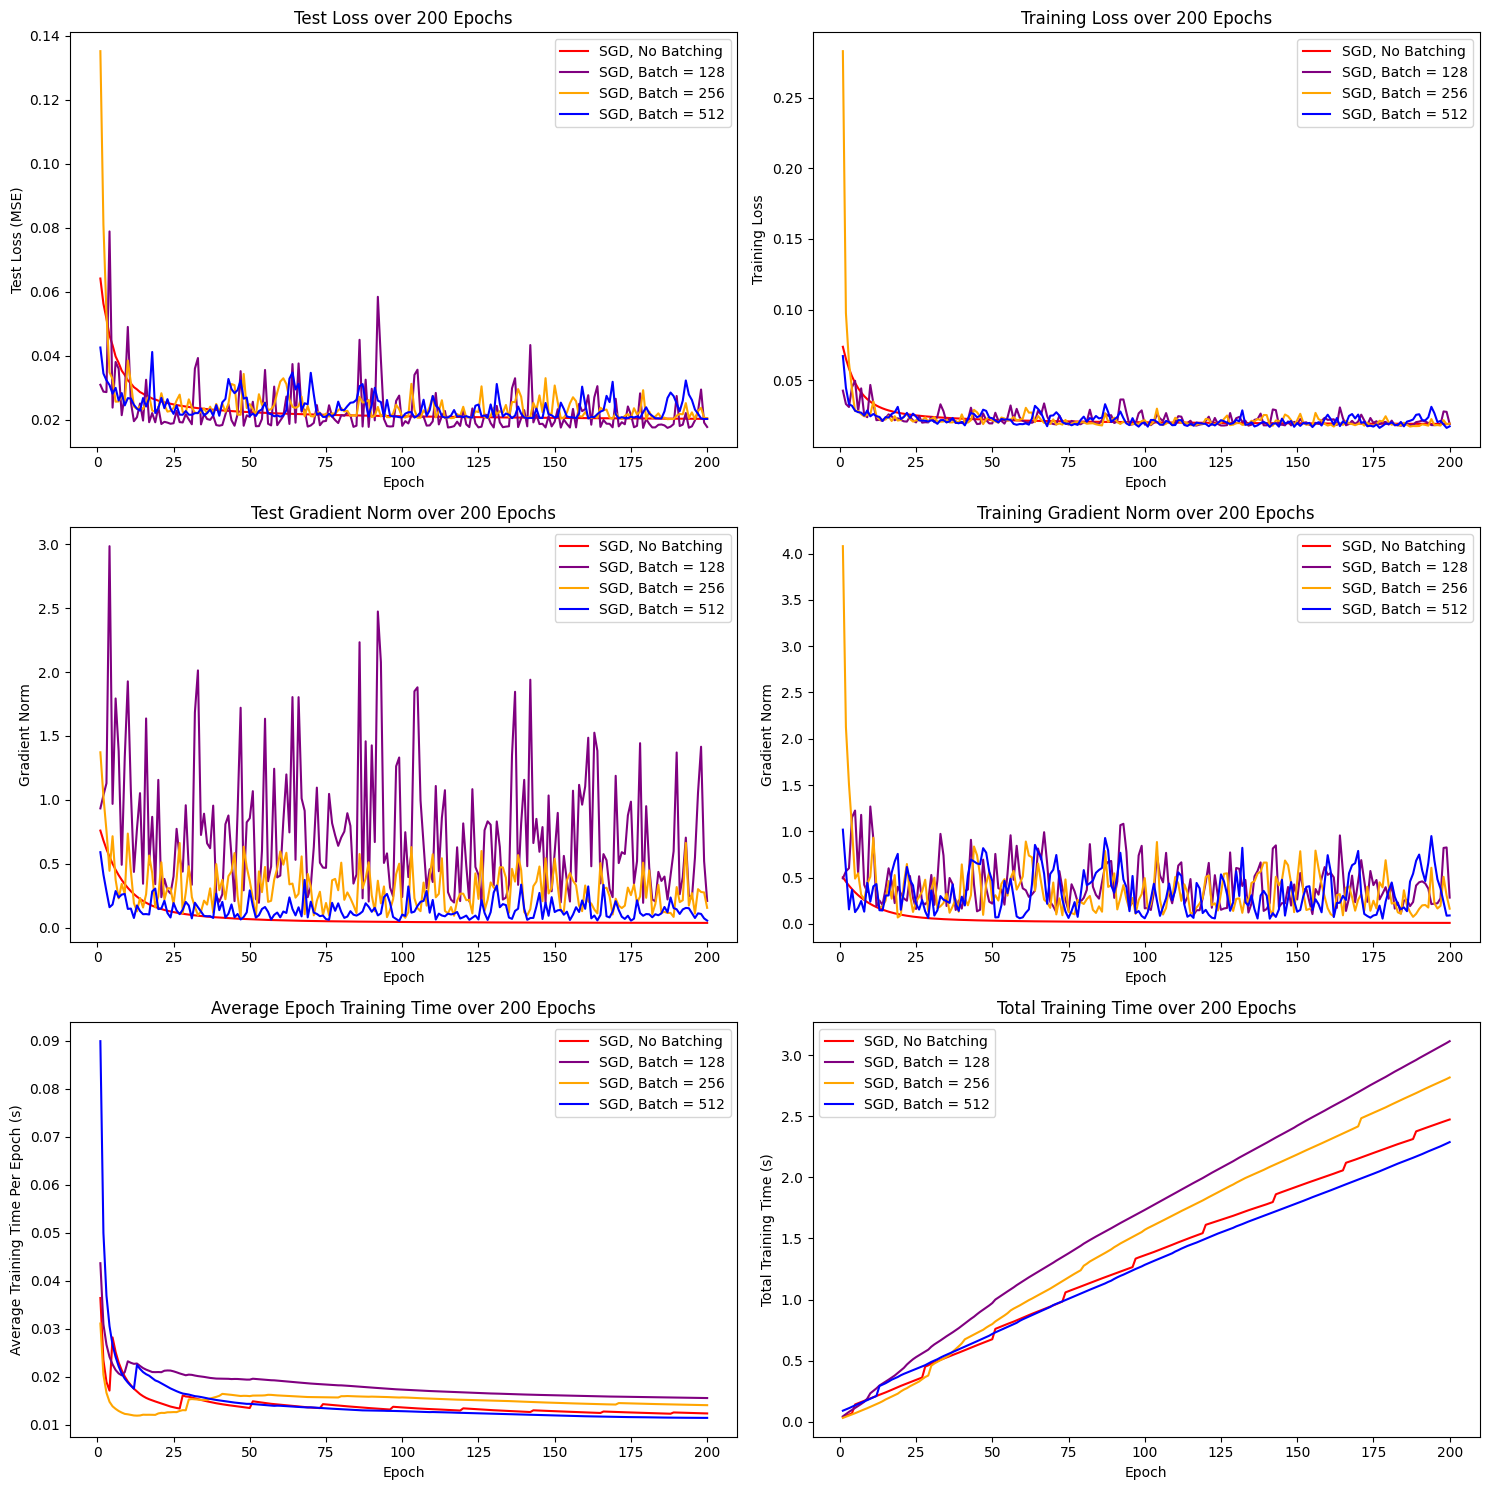

In [10]:
# File paths for SGD with different batch sizes
SGD_file_path = "communities_and_crime/GD/lr-0.055/200/no_batching/2024-09-24-10:20:31/results.csv"
SGD_32_file_path = "communities_and_crime/GD/lr-0.055/200/32/2024-09-24-10:29:46/results.csv"
SGD_128_file_path = "communities_and_crime/GD/lr-0.055/200/128/2024-09-24-10:29:35/results.csv"
SGD_256_file_path = "communities_and_crime/GD/lr-0.055/200/256/2024-09-24-10:29:21/results.csv"
SGD_512_file_path = "communities_and_crime/GD/lr-0.055/200/512/2024-09-24-10:29:01/results.csv"

# Read the CSV files for different batch sizes
SGD_stats = pd.read_csv(SGD_file_path)
SGD_32_stats = pd.read_csv(SGD_32_file_path)
SGD_128_stats = pd.read_csv(SGD_128_file_path)
SGD_256_stats = pd.read_csv(SGD_256_file_path)
SGD_512_stats = pd.read_csv(SGD_512_file_path)

# Extract data from DataFrames
epochs = SGD_stats['Epoch']  # Assuming all have the same epochs

# Extract data for various batch sizes
SGD_test_loss = SGD_stats['Test Loss']
SGD_32_test_loss = SGD_32_stats['Test Loss']
SGD_128_test_loss = SGD_128_stats['Test Loss']
SGD_256_test_loss = SGD_256_stats['Test Loss']
SGD_512_test_loss = SGD_512_stats['Test Loss']

SGD_training_loss = SGD_stats['Training Loss']
SGD_32_training_loss = SGD_32_stats['Training Loss']
SGD_128_training_loss = SGD_128_stats['Training Loss']
SGD_256_training_loss = SGD_256_stats['Training Loss']
SGD_512_training_loss = SGD_512_stats['Training Loss']

SGD_train_norm = SGD_stats['Training Gradient Norm']
SGD_32_train_norm = SGD_32_stats['Training Gradient Norm']
SGD_128_train_norm = SGD_128_stats['Training Gradient Norm']
SGD_256_train_norm = SGD_256_stats['Training Gradient Norm']
SGD_512_train_norm = SGD_512_stats['Training Gradient Norm']

SGD_test_norm = SGD_stats['Test Gradient Norm']
SGD_32_test_norm = SGD_32_stats['Test Gradient Norm']
SGD_128_test_norm = SGD_128_stats['Test Gradient Norm']
SGD_256_test_norm = SGD_256_stats['Test Gradient Norm']
SGD_512_test_norm = SGD_512_stats['Test Gradient Norm']

# Calculate average training time (expanding mean) for each batch size
SGD_avg_training_time = SGD_stats['Training Time (s)'].expanding().mean()
SGD_32_avg_training_time = SGD_32_stats['Training Time (s)'].expanding().mean()
SGD_128_avg_training_time = SGD_128_stats['Training Time (s)'].expanding().mean()
SGD_256_avg_training_time = SGD_256_stats['Training Time (s)'].expanding().mean()
SGD_512_avg_training_time = SGD_512_stats['Training Time (s)'].expanding().mean()

# Calculate total training time (expanding sum) for each batch size
SGD_total_training_time = SGD_stats['Training Time (s)'].expanding().sum()
SGD_32_total_training_time = SGD_32_stats['Training Time (s)'].expanding().sum()
SGD_128_total_training_time = SGD_128_stats['Training Time (s)'].expanding().sum()
SGD_256_total_training_time = SGD_256_stats['Training Time (s)'].expanding().sum()
SGD_512_total_training_time = SGD_512_stats['Training Time (s)'].expanding().sum()

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Test Loss
axes[0, 0].plot(epochs, SGD_test_loss, label='SGD, No Batching', color='red')
# axes[0, 0].plot(epochs, SGD_32_test_loss, label='SGD, Batch = 32', color='green')
axes[0, 0].plot(epochs, SGD_128_test_loss, label='SGD, Batch = 128', color='purple')
axes[0, 0].plot(epochs, SGD_256_test_loss, label='SGD, Batch = 256', color='orange')
axes[0, 0].plot(epochs, SGD_512_test_loss, label='SGD, Batch = 512', color='blue')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Test Loss (MSE)')
axes[0, 0].set_title(f'Test Loss over {len(epochs)} Epochs')
axes[0, 0].legend()

# Plot 2: Training Loss
axes[0, 1].plot(epochs, SGD_training_loss, label='SGD, No Batching', color='red')
# axes[0, 1].plot(epochs, SGD_32_training_loss, label='SGD, Batch = 32', color='green')
axes[0, 1].plot(epochs, SGD_128_training_loss, label='SGD, Batch = 128', color='purple')
axes[0, 1].plot(epochs, SGD_256_training_loss, label='SGD, Batch = 256', color='orange')
axes[0, 1].plot(epochs, SGD_512_training_loss, label='SGD, Batch = 512', color='blue')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Training Loss')
axes[0, 1].set_title(f'Training Loss over {len(epochs)} Epochs')
axes[0, 1].legend()

# Plot 3: Training Gradient Norm
axes[1, 1].plot(epochs, SGD_train_norm, label='SGD, No Batching', color='red')
# axes[1, 1].plot(epochs, SGD_32_train_norm, label='SGD, Batch = 32', color='green')
axes[1, 1].plot(epochs, SGD_128_train_norm, label='SGD, Batch = 128', color='purple')
axes[1, 1].plot(epochs, SGD_256_train_norm, label='SGD, Batch = 256', color='orange')
axes[1, 1].plot(epochs, SGD_512_train_norm, label='SGD, Batch = 512', color='blue')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Gradient Norm')
axes[1, 1].set_title(f'Training Gradient Norm over {len(epochs)} Epochs')
axes[1, 1].legend()

# Plot 4: Test Gradient Norm
axes[1, 0].plot(epochs, SGD_test_norm, label='SGD, No Batching', color='red')
# axes[1, 0].plot(epochs, SGD_32_test_norm, label='SGD, Batch = 32', color='green')
axes[1, 0].plot(epochs, SGD_128_test_norm, label='SGD, Batch = 128', color='purple')
axes[1, 0].plot(epochs, SGD_256_test_norm, label='SGD, Batch = 256', color='orange')
axes[1, 0].plot(epochs, SGD_512_test_norm, label='SGD, Batch = 512', color='blue')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Gradient Norm')
axes[1, 0].set_title(f'Test Gradient Norm over {len(epochs)} Epochs')
axes[1, 0].legend()

# Plot 5: Average Training Time
axes[2, 0].plot(epochs, SGD_avg_training_time, label='SGD, No Batching', color='red')
# axes[2, 0].plot(epochs, SGD_32_avg_training_time, label='SGD, Batch = 32', color='green')
axes[2, 0].plot(epochs, SGD_128_avg_training_time, label='SGD, Batch = 128', color='purple')
axes[2, 0].plot(epochs, SGD_256_avg_training_time, label='SGD, Batch = 256', color='orange')
axes[2, 0].plot(epochs, SGD_512_avg_training_time, label='SGD, Batch = 512', color='blue')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Average Training Time Per Epoch (s)')
axes[2, 0].set_title(f'Average Epoch Training Time over {len(epochs)} Epochs')
axes[2, 0].legend()

# Plot 6: Total Training Time
axes[2, 1].plot(epochs, SGD_total_training_time, label='SGD, No Batching', color='red')
# axes[2, 1].plot(epochs, SGD_32_total_training_time, label='SGD, Batch = 32', color='green')
axes[2, 1].plot(epochs, SGD_128_total_training_time, label='SGD, Batch = 128', color='purple')
axes[2, 1].plot(epochs, SGD_256_total_training_time, label='SGD, Batch = 256', color='orange')
axes[2, 1].plot(epochs, SGD_512_total_training_time, label='SGD, Batch = 512', color='blue')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Total Training Time (s)')
axes[2, 1].set_title(f'Total Training Time over {len(epochs)} Epochs')
axes[2, 1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


#### Best GNOM (lr = 0.001, batch size = 32, 128) vs. Best SGD (lr = 0.055, no batch and batch size = 128)

In [27]:
GNOM_32_file = "communities_and_crime/GNOM/lr-0.001/200/32/2024-09-24-10:45:55/results.csv"
GNOM_32 = pd.read_csv(GNOM_32_file)

GNOM_128_file = "communities_and_crime/GNOM/lr-0.001/200/128/2024-09-24-10:46:17/results.csv"
GNOM_128 = pd.read_csv(GNOM_128_file)

SGD_file_path = "communities_and_crime/GD/lr-0.055/200/no_batching/2024-09-24-10:20:31/results.csv"
SGD_128_file_path = "communities_and_crime/GD/lr-0.055/200/128/2024-09-24-10:29:35/results.csv"

# Read the CSV files for different batch sizes
SGD_stats = pd.read_csv(SGD_file_path)
SGD_128_stats = pd.read_csv(SGD_128_file_path)

In [29]:
# WITH NEW GRADIENT NORM CALCULATION

GNOM_32_file = "communities_and_crime/GNOM/lr-0.001/200/32/2024-09-24-16:29:14/results.csv"
GNOM_32 = pd.read_csv(GNOM_32_file)

GNOM_128_file = "communities_and_crime/GNOM/lr-0.001/200/128/2024-09-24-16:07:43/results.csv"
GNOM_128 = pd.read_csv(GNOM_128_file)

SGD_file_path = "communities_and_crime/GD/lr-0.055/200/no_batching/2024-09-24-15:16:01/results.csv"
SGD_128_file_path = "communities_and_crime/GD/lr-0.055/200/128/2024-09-24-15:27:38/results.csv"

# Read the CSV files for different batch sizes
SGD_stats = pd.read_csv(SGD_file_path)
SGD_128_stats = pd.read_csv(SGD_128_file_path)

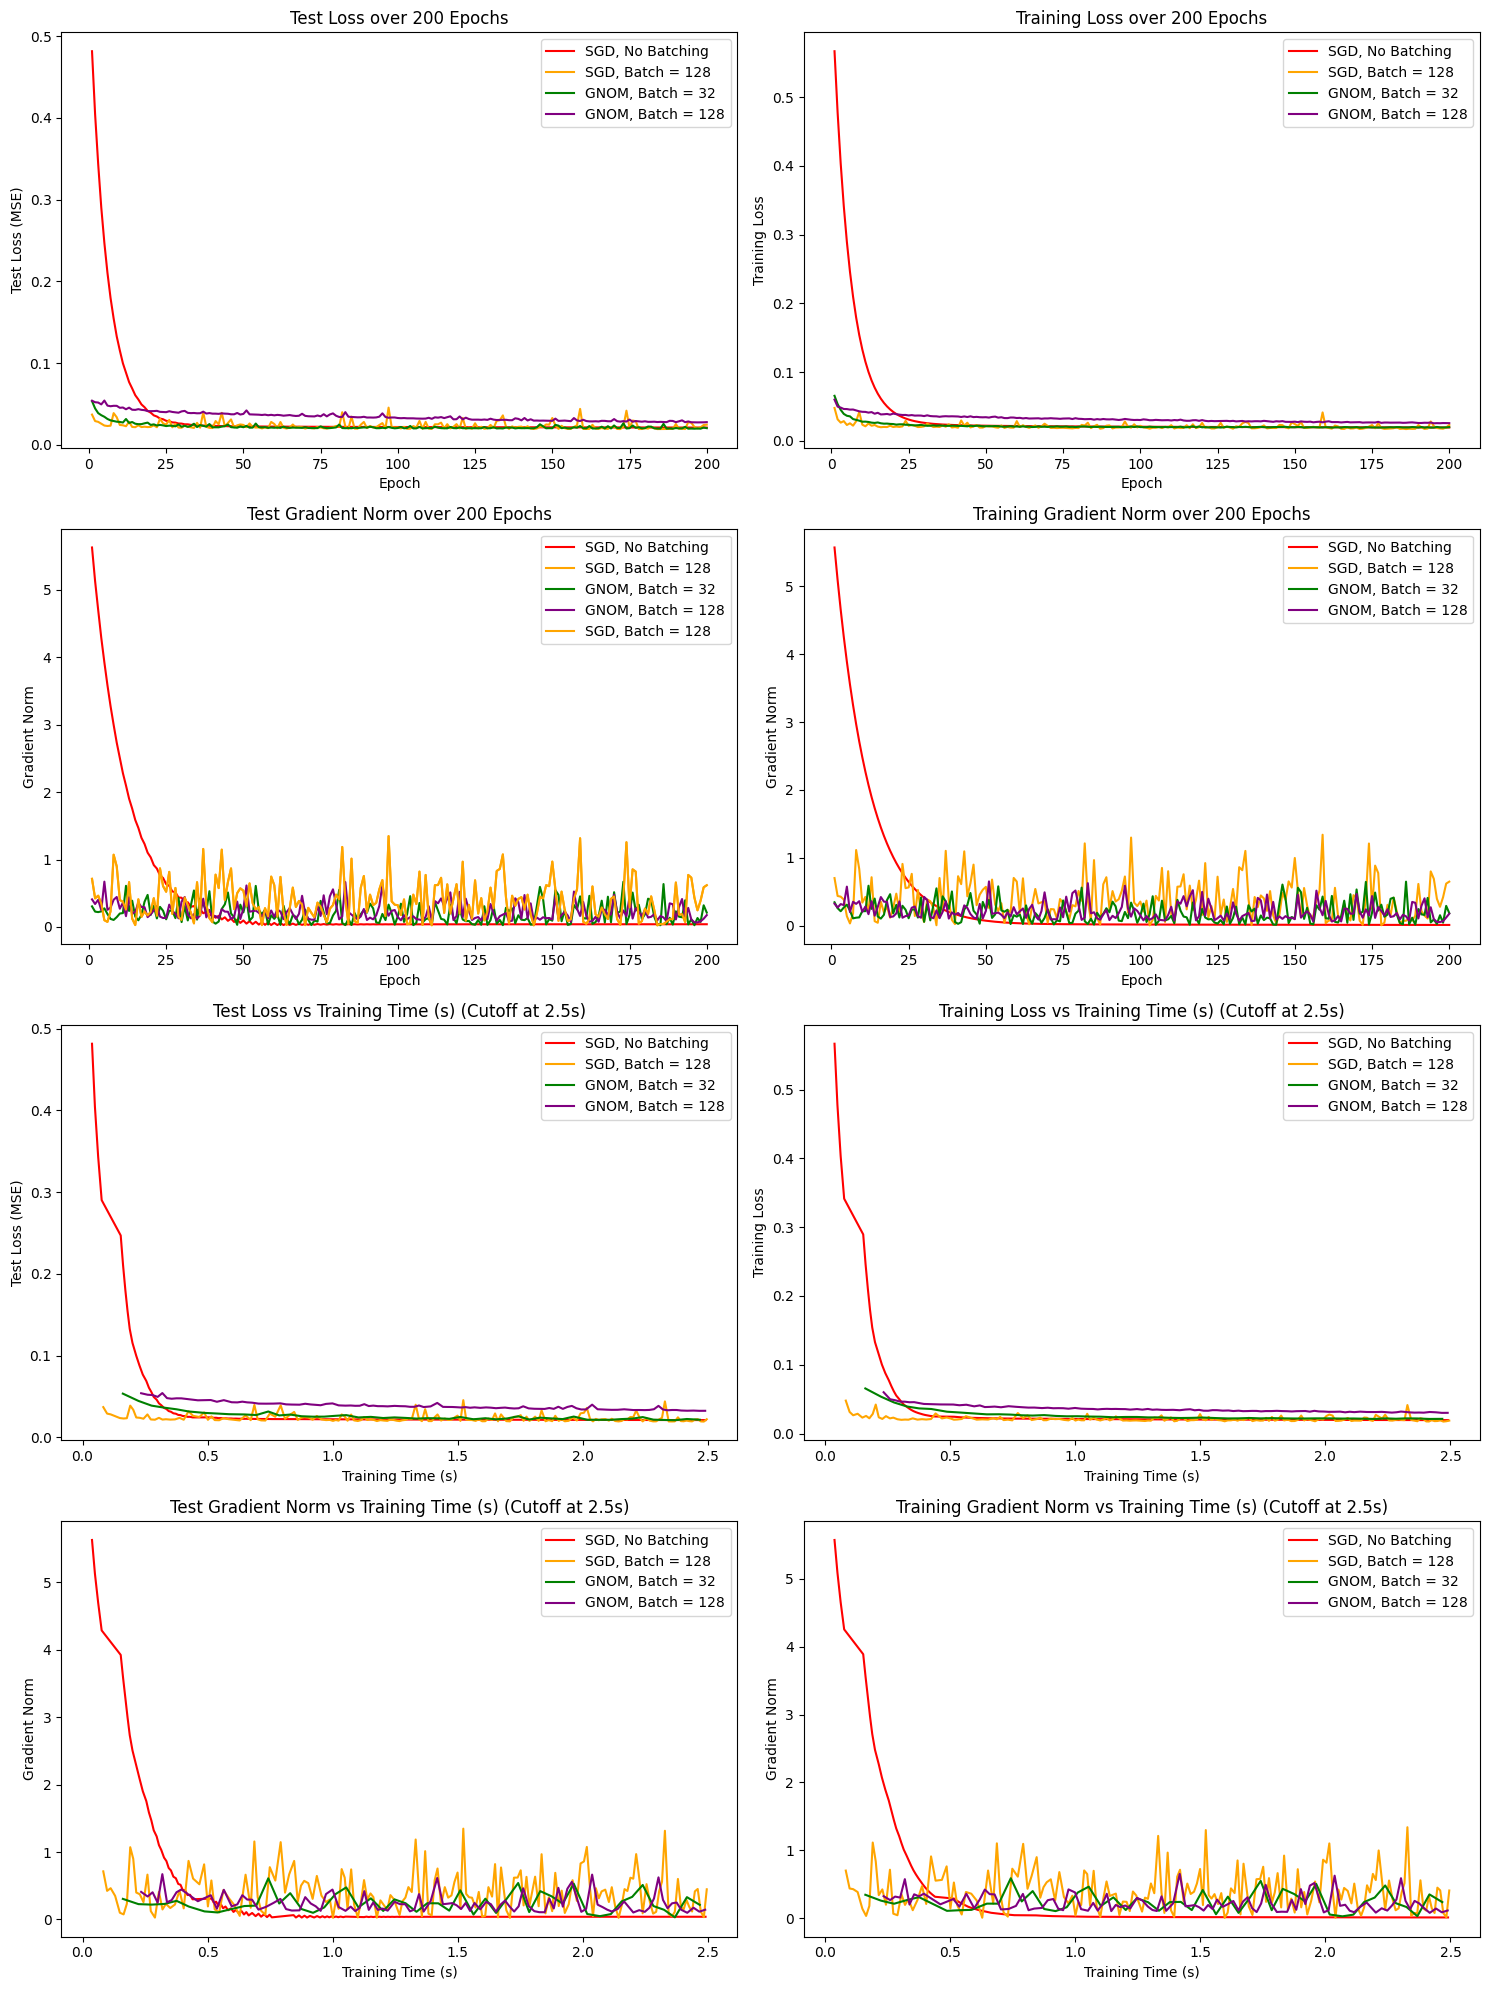

In [37]:
# Extract data from DataFrames
epochs = SGD_stats['Epoch']  # Assuming all have the same epochs

# Extract data for various datasets
SGD_test_loss = SGD_stats['Test Loss']
GNOM_32_test_loss = GNOM_32['Test Loss']
GNOM_128_test_loss = GNOM_128['Test Loss']
SGD_128_test_loss = SGD_128_stats['Test Loss']

SGD_training_loss = SGD_stats['Training Loss']
GNOM_32_training_loss = GNOM_32['Training Loss']
GNOM_128_training_loss = GNOM_128['Training Loss']
SGD_128_training_loss = SGD_128_stats['Training Loss']

SGD_train_norm = SGD_stats['Training Gradient Norm']
GNOM_32_train_norm = GNOM_32['Training Gradient Norm']
GNOM_128_train_norm = GNOM_128['Training Gradient Norm']
SGD_128_train_norm = SGD_128_stats['Training Gradient Norm']

SGD_test_norm = SGD_stats['Test Gradient Norm']
GNOM_32_test_norm = GNOM_32['Test Gradient Norm']
GNOM_128_test_norm = GNOM_128['Test Gradient Norm']
SGD_128_test_norm = SGD_128_stats['Test Gradient Norm']

# Calculate total training time (expanding sum) for each dataset
SGD_total_training_time = SGD_stats['Training Time (s)'].expanding().sum()
GNOM_32_total_training_time = GNOM_32['Training Time (s)'].expanding().sum()
GNOM_128_total_training_time = GNOM_128['Training Time (s)'].expanding().sum()
SGD_128_total_training_time = SGD_128_stats['Training Time (s)'].expanding().sum()

# Define the cutoff time
cutoff_time = 2.5  # Cutoff time in seconds

# Filter the data based on the cutoff time
SGD_total_training_time_cutoff = SGD_total_training_time[SGD_total_training_time <= cutoff_time]
GNOM_32_total_training_time_cutoff = GNOM_32_total_training_time[GNOM_32_total_training_time <= cutoff_time]
GNOM_128_total_training_time_cutoff = GNOM_128_total_training_time[GNOM_128_total_training_time <= cutoff_time]
SGD_128_total_training_time_cutoff = SGD_128_total_training_time[SGD_128_total_training_time <= cutoff_time]

# Match the corresponding losses and norms to the cutoff times
SGD_test_loss_cutoff = SGD_test_loss[:len(SGD_total_training_time_cutoff)]
GNOM_32_test_loss_cutoff = GNOM_32_test_loss[:len(GNOM_32_total_training_time_cutoff)]
GNOM_128_test_loss_cutoff = GNOM_128_test_loss[:len(GNOM_128_total_training_time_cutoff)]
SGD_128_test_loss_cutoff = SGD_128_test_loss[:len(SGD_128_total_training_time_cutoff)]

SGD_training_loss_cutoff = SGD_training_loss[:len(SGD_total_training_time_cutoff)]
GNOM_32_training_loss_cutoff = GNOM_32_training_loss[:len(GNOM_32_total_training_time_cutoff)]
GNOM_128_training_loss_cutoff = GNOM_128_training_loss[:len(GNOM_128_total_training_time_cutoff)]
SGD_128_training_loss_cutoff = SGD_128_training_loss[:len(SGD_128_total_training_time_cutoff)]

SGD_train_norm_cutoff = SGD_train_norm[:len(SGD_total_training_time_cutoff)]
GNOM_32_train_norm_cutoff = GNOM_32_train_norm[:len(GNOM_32_total_training_time_cutoff)]
GNOM_128_train_norm_cutoff = GNOM_128_train_norm[:len(GNOM_128_total_training_time_cutoff)]
SGD_128_train_norm_cutoff = SGD_128_train_norm[:len(SGD_128_total_training_time_cutoff)]

SGD_test_norm_cutoff = SGD_test_norm[:len(SGD_total_training_time_cutoff)]
GNOM_32_test_norm_cutoff = GNOM_32_test_norm[:len(GNOM_32_total_training_time_cutoff)]
GNOM_128_test_norm_cutoff = GNOM_128_test_norm[:len(GNOM_128_total_training_time_cutoff)]
SGD_128_test_norm_cutoff = SGD_128_test_norm[:len(SGD_128_total_training_time_cutoff)]

fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# Plot 1: Test Loss
axes[0, 0].plot(epochs, SGD_test_loss, label='SGD, No Batching', color='red')
axes[0, 0].plot(epochs, SGD_128_test_loss, label='SGD, Batch = 128', color='orange')
axes[0, 0].plot(epochs, GNOM_32_test_loss, label='GNOM, Batch = 32', color='green')
axes[0, 0].plot(epochs, GNOM_128_test_loss, label='GNOM, Batch = 128', color='purple')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Test Loss (MSE)')
axes[0, 0].set_title(f'Test Loss over {len(epochs)} Epochs')
axes[0, 0].legend()

# Plot 2: Training Loss
axes[0, 1].plot(epochs, SGD_training_loss, label='SGD, No Batching', color='red')
axes[0, 1].plot(epochs, SGD_128_training_loss, label='SGD, Batch = 128', color='orange')
axes[0, 1].plot(epochs, GNOM_32_training_loss, label='GNOM, Batch = 32', color='green')
axes[0, 1].plot(epochs, GNOM_128_training_loss, label='GNOM, Batch = 128', color='purple')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Training Loss')
axes[0, 1].set_title(f'Training Loss over {len(epochs)} Epochs')
axes[0, 1].legend()

# Plot 3: Test Gradient Norm
axes[1, 0].plot(epochs, SGD_test_norm, label='SGD, No Batching', color='red')
axes[1, 0].plot(epochs, SGD_128_test_norm, label='SGD, Batch = 128', color='orange')
axes[1, 0].plot(epochs, GNOM_32_test_norm, label='GNOM, Batch = 32', color='green')
axes[1, 0].plot(epochs, GNOM_128_test_norm, label='GNOM, Batch = 128', color='purple')
axes[1, 0].plot(epochs, SGD_128_test_norm, label='SGD, Batch = 128', color='orange')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Gradient Norm')
axes[1, 0].set_title(f'Test Gradient Norm over {len(epochs)} Epochs')
axes[1, 0].legend()

# Plot 4: Training Gradient Norm
axes[1, 1].plot(epochs, SGD_train_norm, label='SGD, No Batching', color='red')
axes[1, 1].plot(epochs, SGD_128_train_norm, label='SGD, Batch = 128', color='orange')
axes[1, 1].plot(epochs, GNOM_32_train_norm, label='GNOM, Batch = 32', color='green')
axes[1, 1].plot(epochs, GNOM_128_train_norm, label='GNOM, Batch = 128', color='purple')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Gradient Norm')
axes[1, 1].set_title(f'Training Gradient Norm over {len(epochs)} Epochs')
axes[1, 1].legend()

# Plot 5: Test Loss vs time (cutoff)
axes[2, 0].plot(SGD_total_training_time_cutoff, SGD_test_loss_cutoff, label='SGD, No Batching', color='red')
axes[2, 0].plot(SGD_128_total_training_time_cutoff, SGD_128_test_loss_cutoff, label='SGD, Batch = 128', color='orange')
axes[2, 0].plot(GNOM_32_total_training_time_cutoff, GNOM_32_test_loss_cutoff, label='GNOM, Batch = 32', color='green')
axes[2, 0].plot(GNOM_128_total_training_time_cutoff, GNOM_128_test_loss_cutoff, label='GNOM, Batch = 128', color='purple')
axes[2, 0].set_xlabel('Training Time (s)')
axes[2, 0].set_ylabel('Test Loss (MSE)')
axes[2, 0].set_title(f'Test Loss vs Training Time (s) (Cutoff at {cutoff_time}s)')
axes[2, 0].legend()

# Plot 6: Training Loss vs time (cutoff)
axes[2, 1].plot(SGD_total_training_time_cutoff, SGD_training_loss_cutoff, label='SGD, No Batching', color='red')
axes[2, 1].plot(SGD_128_total_training_time_cutoff, SGD_128_training_loss_cutoff, label='SGD, Batch = 128', color='orange')
axes[2, 1].plot(GNOM_32_total_training_time_cutoff, GNOM_32_training_loss_cutoff, label='GNOM, Batch = 32', color='green')
axes[2, 1].plot(GNOM_128_total_training_time_cutoff, GNOM_128_training_loss_cutoff, label='GNOM, Batch = 128', color='purple')
axes[2, 1].set_xlabel('Training Time (s)')
axes[2, 1].set_ylabel('Training Loss')
axes[2, 1].set_title(f'Training Loss vs Training Time (s) (Cutoff at {cutoff_time}s)')
axes[2, 1].legend()

# Plot 7: Test Gradient Norm vs time (cutoff)
axes[3, 0].plot(SGD_total_training_time_cutoff, SGD_test_norm_cutoff, label='SGD, No Batching', color='red')
axes[3, 0].plot(SGD_128_total_training_time_cutoff, SGD_128_test_norm_cutoff, label='SGD, Batch = 128', color='orange')
axes[3, 0].plot(GNOM_32_total_training_time_cutoff, GNOM_32_test_norm_cutoff, label='GNOM, Batch = 32', color='green')
axes[3, 0].plot(GNOM_128_total_training_time_cutoff, GNOM_128_test_norm_cutoff, label='GNOM, Batch = 128', color='purple')
axes[3, 0].set_xlabel('Training Time (s)')
axes[3, 0].set_ylabel('Gradient Norm')
axes[3, 0].set_title(f'Test Gradient Norm vs Training Time (s) (Cutoff at {cutoff_time}s)')
axes[3, 0].legend()

# Plot 8: Training Gradient Norm vs time (cutoff)
axes[3, 1].plot(SGD_total_training_time_cutoff, SGD_train_norm_cutoff, label='SGD, No Batching', color='red')
axes[3, 1].plot(SGD_128_total_training_time_cutoff, SGD_128_train_norm_cutoff, label='SGD, Batch = 128', color='orange')
axes[3, 1].plot(GNOM_32_total_training_time_cutoff, GNOM_32_train_norm_cutoff, label='GNOM, Batch = 32', color='green')
axes[3, 1].plot(GNOM_128_total_training_time_cutoff, GNOM_128_train_norm_cutoff, label='GNOM, Batch = 128', color='purple')
axes[3, 1].set_xlabel('Training Time (s)')
axes[3, 1].set_ylabel('Gradient Norm')
axes[3, 1].set_title(f'Training Gradient Norm vs Training Time (s) (Cutoff at {cutoff_time}s)')
axes[3, 1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


#### Testing New Norm Calculations

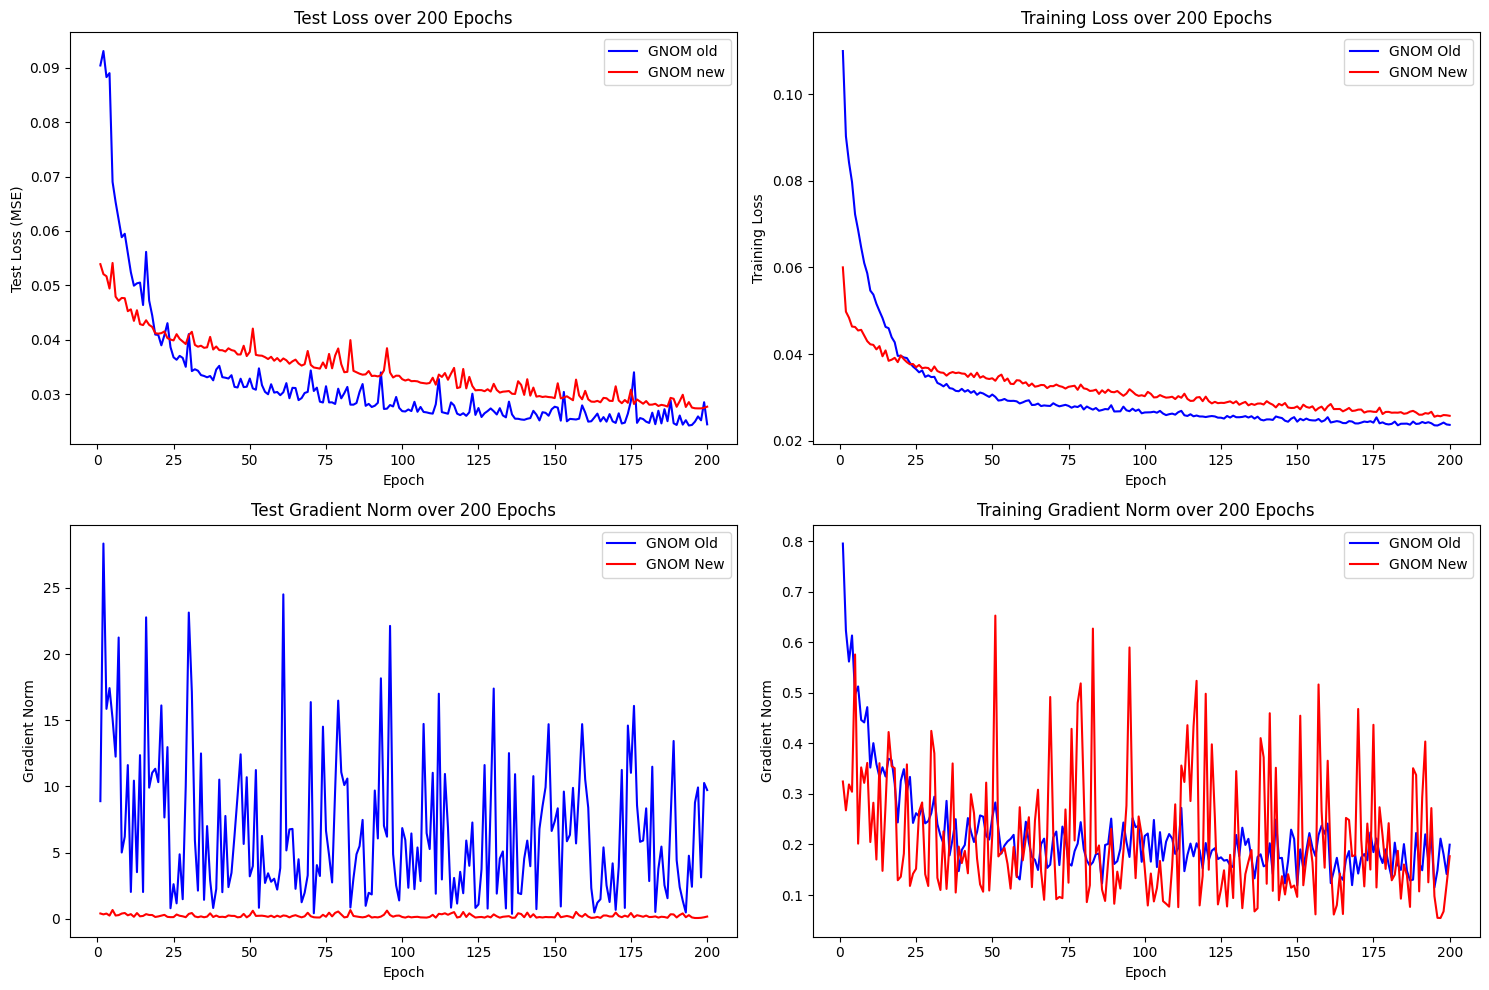

In [22]:
GNOM_new_file = "communities_and_crime/GNOM/lr-0.001/200/128/2024-09-24-16:07:43/results.csv"
GNOM_new = pd.read_csv(GNOM_new_file)

GNOM_old_file = "communities_and_crime/GNOM/lr-0.001/200/128/2024-09-24-10:46:17/results.csv"
GNOM_old = pd.read_csv(GNOM_old_file)

# Extract data from DataFrames
epochs = GNOM_old['Epoch']
num_epochs = len(epochs)

GNOM_old_test_loss = GNOM_old['Test Loss']
GNOM_new_test_loss = GNOM_new['Test Loss']

GNOM_old_training_loss = GNOM_old['Training Loss']
GNOM_new_training_loss = GNOM_new['Training Loss']

GNOM_old_train_norm = GNOM_old['Training Gradient Norm']
GNOM_new_train_norm = GNOM_new['Training Gradient Norm']

GNOM_old_test_norm = GNOM_old['Test Gradient Norm']
GNOM_new_test_norm = GNOM_new['Test Gradient Norm']

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Test Loss
axes[0, 0].plot(epochs, GNOM_old_test_loss, label='GNOM old', color='blue')
axes[0, 0].plot(epochs, GNOM_new_test_loss, label='GNOM new', color='red')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Test Loss (MSE)')
axes[0, 0].set_title(f'Test Loss over {num_epochs} Epochs')
axes[0, 0].legend()

# Plot 2: Training Loss
axes[0, 1].plot(epochs, GNOM_old_training_loss, label='GNOM Old', color='blue')
axes[0, 1].plot(epochs, GNOM_new_training_loss, label='GNOM New', color='red')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Training Loss')
axes[0, 1].set_title(f'Training Loss over {num_epochs} Epochs')
axes[0, 1].legend()

# Plot 3: Training Gradient Norm
axes[1, 1].plot(epochs, GNOM_old_train_norm, label='GNOM Old', color='blue')
axes[1, 1].plot(epochs, GNOM_new_train_norm, label='GNOM New', color='red')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Gradient Norm')
axes[1, 1].set_title(f'Training Gradient Norm over {num_epochs} Epochs')
axes[1, 1].legend()

# Plot 4: Test Gradient Norm
axes[1, 0].plot(epochs, GNOM_old_test_norm, label='GNOM Old', color='blue')
axes[1, 0].plot(epochs, GNOM_new_test_norm, label='GNOM New', color='red')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Gradient Norm')
axes[1, 0].set_title(f'Test Gradient Norm over {num_epochs} Epochs')
axes[1, 0].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

#### 1000 Epoch Run Comparison

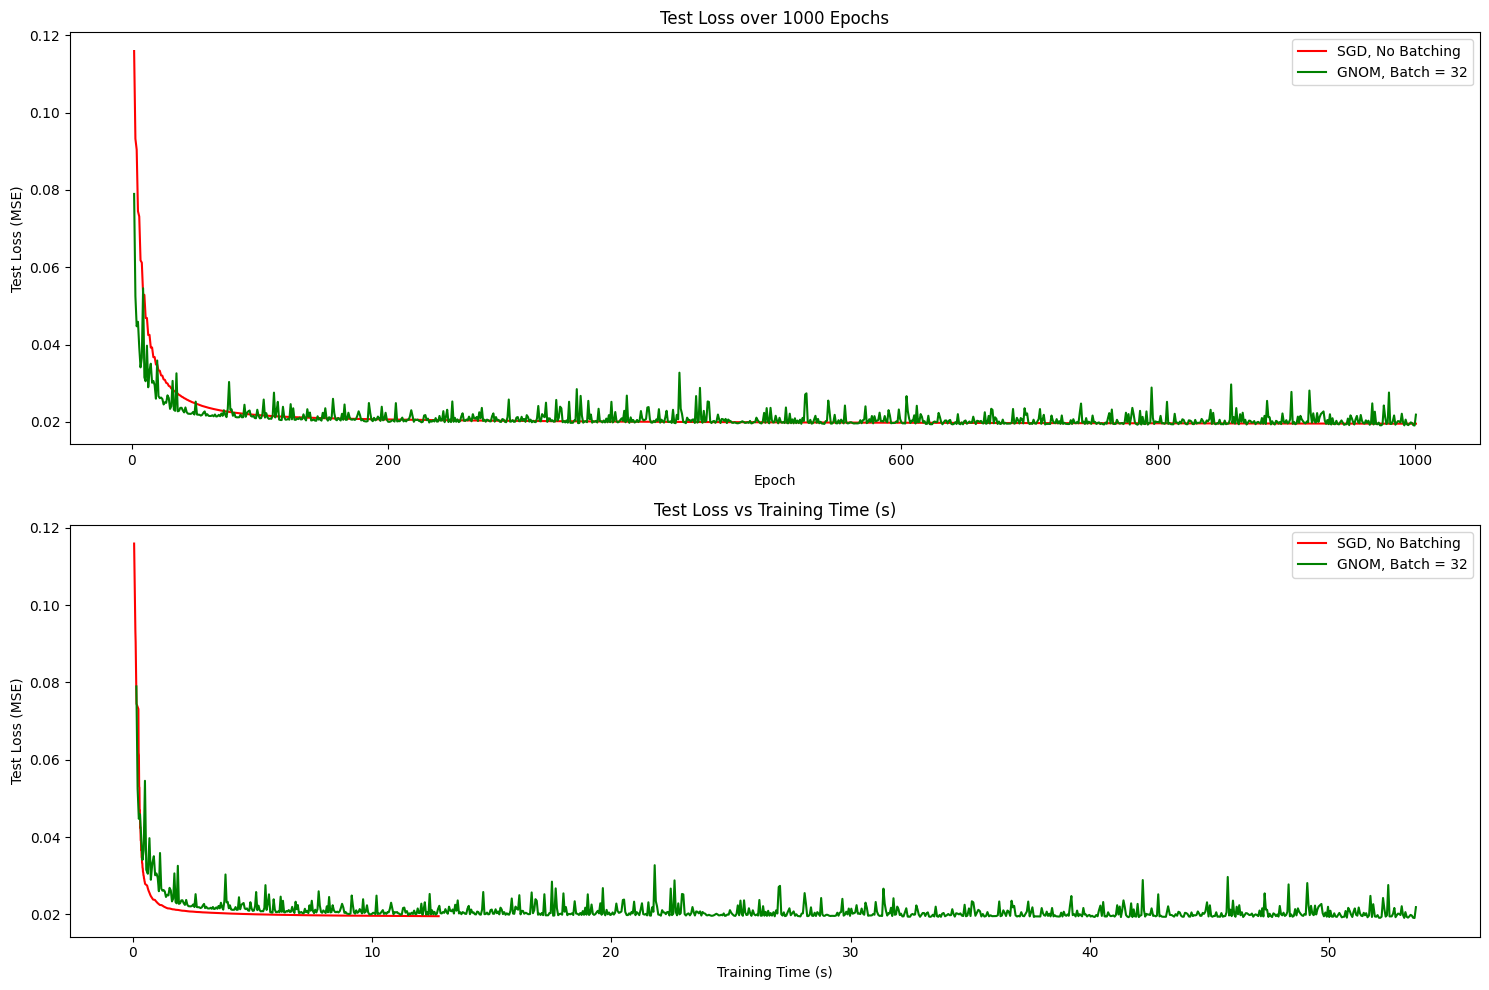

In [5]:
GNOM_1000_file = "communities_and_crime/GNOM/lr-0.001/1000/32/2024-09-24-17:59:15/results.csv"
GNOM_1000 = pd.read_csv(GNOM_1000_file)


SGD_1000_file = "communities_and_crime/GD/lr-0.055/1000/no_batching/2024-09-24-17:53:43/results.csv"
SGD_1000 = pd.read_csv(SGD_1000_file)

# Extract data from DataFrames
epochs = GNOM_1000['Epoch']  # Assuming all have the same epochs

# Extract data for various datasets
SGD_test_loss = SGD_1000['Test Loss']
GNOM_test_loss = GNOM_1000['Test Loss']

# Calculate total training time (expanding sum) for each dataset
SGD_total_training_time = SGD_1000['Training Time (s)'].expanding().sum()
GNOM_total_training_time = GNOM_1000['Training Time (s)'].expanding().sum()

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: Test Loss
axes[0].plot(epochs, SGD_test_loss, label='SGD, No Batching', color='red')
axes[0].plot(epochs, GNOM_test_loss, label='GNOM, Batch = 32', color='green')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Test Loss (MSE)')
axes[0].set_title(f'Test Loss over {len(epochs)} Epochs')
axes[0].legend()

# Plot 5: Test Loss vs time
axes[1].plot(SGD_total_training_time, SGD_test_loss, label='SGD, No Batching', color='red')
axes[1].plot(GNOM_total_training_time, GNOM_test_loss, label='GNOM, Batch = 32', color='green')
axes[1].set_xlabel('Training Time (s)')
axes[1].set_ylabel('Test Loss (MSE)')
axes[1].set_title(f'Test Loss vs Training Time (s)')
axes[1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()